In [ ]:

!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download captaindatasets/istanbul-mall

!unzip -q istanbul-mall.zip -d istanbul_mall_data

import pandas as pd
import os



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/captaindatasets/istanbul-mall
License(s): other
  0% 0.00/6.83M [00:00<?, ?B/s]
100% 6.83M/6.83M [00:00<00:00, 273MB/s]


In [ ]:

print(os.listdir('istanbul_mall_data'))

customer_df = pd.read_excel('istanbul_mall_data/customer_data.xlsx')


['shopping_mall_data.xlsx', 'customer_data.xlsx', 'sales_data.xlsx']


In [ ]:
customer_df = pd.read_excel('istanbul_mall_data/customer_data.xlsx')
mall_df = pd.read_excel('istanbul_mall_data/shopping_mall_data.xlsx')
sales_df = pd.read_excel('istanbul_mall_data/sales_data.xlsx')

In [ ]:
customer_df.describe()

,age
count,99338.000000
mean,43.425859
std,14.989400
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,69.000000


In [ ]:
mall_df.describe()

,construction_year,area (sqm),store_count
count,10.000000,10.000000,10.000000
mean,1976.600000,154800.000000,186.000000
std,14.982953,61450.612509,45.264654
min,1956.000000,56000.000000,130.000000
25%,1964.750000,120000.000000,145.000000
50%,1976.500000,139000.000000,185.000000
75%,1985.000000,205250.000000,215.000000
max,2002.000000,250000.000000,270.000000


In [ ]:
sales_df.describe()

,quantity,price
count,99457.000000,99457.000000
mean,3.003429,689.256321
std,1.413025,941.184567
min,1.000000,5.230000
25%,2.000000,45.450000
50%,3.000000,203.300000
75%,4.000000,1200.320000
max,5.000000,5250.000000


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   invoice date   99457 non-null  object 
 5   price          99457 non-null  float64
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.3+ MB


In [ ]:
sales_df.isna().sum()

,0
invoice_no,0
customer_id,0
category,0
quantity,0
invoice date,0
price,0
shopping_mall,0


In [ ]:
customer_df.isna().sum()

,0
customer_id,0
gender,0
age,119
payment_method,0


In [ ]:
mall_df.isna().sum()

,0
shopping_mall,0
construction_year,0
area (sqm),0
location,0
store_count,0


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
# we will remove data objects with null age. This means we need to delete these ids from the
# sales_df as well.

# 1. Find customer_ids with null age in customer_df
null_age_customers = customer_df[customer_df['age'].isna()]['customer_id']

# 2. Remove these customers from customer_df
customer_df_cleaned = customer_df[customer_df['age'].notna()]

# 3. Remove related sales from sales_df
sales_df_cleaned = sales_df[~sales_df['customer_id'].isin(null_age_customers)]


In [ ]:
sales_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99338 non-null  object 
 1   customer_id    99338 non-null  object 
 2   category       99338 non-null  object 
 3   quantity       99338 non-null  int64  
 4   invoice date   99338 non-null  object 
 5   price          99338 non-null  float64
 6   shopping_mall  99338 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.1+ MB


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving glendale_city.csv to glendale_city.csv
Saving irvine_city.csv to irvine_city.csv
Saving losangeles_ciyt.csv to losangeles_ciyt.csv
Saving paloalto_city.csv to paloalto_city.csv
Saving sandiego_city.csv to sandiego_city.csv
Saving santa_clara_city.csv to santa_clara_city.csv
Saving torrance_city.csv to torrance_city.csv
Saving costamesa_city.csv to costamesa_city.csv


In [ ]:
import pandas as pd
import io

dataframes_cities = {}
i = 0
for filename in uploaded.keys():
    df = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')))
    dataframes_cities[i] = df
    i = i +1
    print(filename)



glendale_city.csv
irvine_city.csv
losangeles_ciyt.csv
paloalto_city.csv
sandiego_city.csv
santa_clara_city.csv
torrance_city.csv
costamesa_city.csv


In [ ]:
dataframes_cities[1].head(200)

,Fact,Fact Note,"Irvine city, California","Value Note for Irvine city, California"
0,"Population estimates, July 1, 2024, (V2024)",NaN,"318,683",NaN
1,"Population estimates base, April 1, 2020, (V2024)",NaN,"307,682",NaN
2,"Population, percent change - April 1, 2020 (es...",NaN,3.6%,NaN
3,"Population, Census, April 1, 2020",NaN,"307,670",NaN
4,"Population, Census, April 1, 2010",NaN,"212,375",NaN
...,...,...,...,...
80,S,Suppressed; does not meet publication standards,NaN,NaN
81,X,Not applicable,NaN,NaN
82,Z,Value greater than zero but less than half uni...,NaN,NaN
83,-,Either no or too few sample observations were ...,NaN,NaN


In [ ]:
data_frame_cities_modified = {}

target_rows = ["Population estimates base, April 1, 2020, (V2024)",
               "Persons per household, 2019-2023",
               "High school graduate or higher, percent of persons age 25 years+, 2019-2023",
               "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023",
               "Median households income (in 2023 dollars), 2019-2023",

]

for i, df in dataframes_cities.items():
    # Strip whitespace in the 'Fact' column
    df["Fact"] = df["Fact"].str.strip()


    row = df[df["Fact"].isin(target_rows)]

    data_frame_cities_modified[i] = row


data_frame_cities_modified[0].head()
#This operation allowed us to prune the irrelevant information in the datas.

,Fact,Fact Note,"Glendale city, California","Value Note for Glendale city, California"
1,"Population estimates base, April 1, 2020, (V2024)",NaN,"196,527",NaN
27,"Persons per household, 2019-2023",NaN,2.60,NaN
32,"High school graduate or higher, percent of per...",NaN,89.0%,NaN
33,"Bachelor's degree or higher, percent of person...",NaN,45.5%,NaN
44,"Median households income (in 2023 dollars), 20...",NaN,"$84,262",NaN


In [ ]:
customer_df_cleaned.head()


,customer_id,gender,age,payment_method
0,C241288,Female,28.0,Credit Card
1,C111565,Male,21.0,Debit Card
2,C266599,Male,20.0,Cash
3,C988172,Female,66.0,Credit Card
4,C189076,Female,53.0,Cash


In [ ]:
# gender değişkenine göre age ortalaması


import seaborn as sns
import matplotlib.pyplot as plt

gender_counts = customer_df_cleaned['gender'].value_counts()
print(gender_counts)


gender
Female    59412
Male      39926
Name: count, dtype: int64


In [ ]:
customer_df_cleaned.corr(numeric_only=True)
customer_df_cleaned2 = customer_df_cleaned.copy()

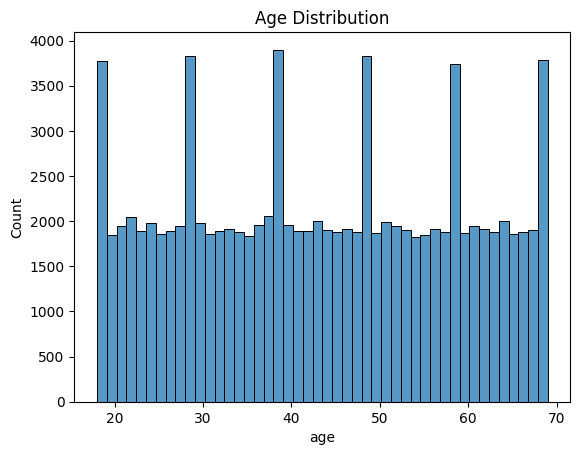

In [ ]:
sns.histplot(customer_df_cleaned2['age'])
plt.title('Age Distribution')
plt.show()

In [ ]:
# Encode categorical variables (e.g., Gender)
customer_df_cleaned2['gender'] = customer_df_cleaned2['gender'].map({'Male': 0, 'Female': 1})



In [ ]:
customer_df_cleaned2.corr(numeric_only=True)

,gender,age
gender,1.000000,0.002282
age,0.002282,1.000000


In [ ]:
sales_df_cleaned.head()

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall
0,I138884,C241288,Clothing,5,05/08/2022,1500.40,South Coast Plaza
1,I317333,C111565,Shoes,3,12/12/2021,1800.51,Beverly Center
2,I127801,C266599,Clothing,1,09/11/2021,300.08,Westfield Century City
3,I173702,C988172,Shoes,5,05/16/2021,3000.85,Stanford Shopping Center
4,I337046,C189076,Books,4,10/24/2021,60.60,South Coast Plaza


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['quantity', 'price']
sales_df_cleaned2 = sales_df_cleaned.copy()
sales_df_cleaned2[num_cols] = scaler.fit_transform(sales_df_cleaned[num_cols])

print(sales_df_cleaned2.head())


  invoice_no customer_id  category  quantity invoice date     price  \
0    I138884     C241288  Clothing  1.412968   05/08/2022  0.861625   
1    I317333     C111565     Shoes -0.002458   12/12/2021  1.180429   
2    I127801     C266599  Clothing -1.417884   09/11/2021 -0.413461   
3    I173702     C988172     Shoes  1.412968   05/16/2021  2.455536   
4    I337046     C189076     Books  0.705255   10/24/2021 -0.667857   

              shopping_mall  
0         South Coast Plaza  
1            Beverly Center  
2    Westfield Century City  
3  Stanford Shopping Center  
4         South Coast Plaza  


Korelasyon Matrisi:
           quantity     price
quantity  1.000000  0.344881
price     0.344881  1.000000


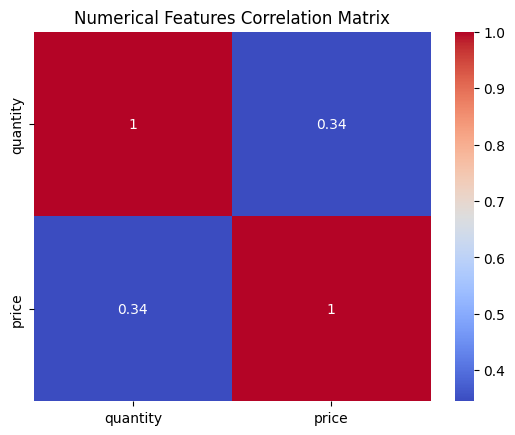

In [ ]:

num_cols = ['quantity', 'price']

# Korelasyon matrisi
corr_matrix = sales_df_cleaned2[num_cols].corr()
print("Korelasyon Matrisi:\n", corr_matrix)

# Korelasyon matrisi ısı haritası
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Numerical Features Correlation Matrix')
plt.show() #bu aktif değil, bir test için yapıldı

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# age sütununu normalize et ve üzerine yaz
customer_df_cleaned2['age'] = scaler.fit_transform(customer_df_cleaned2[['age']])

# Sonuç kontrolü
print(customer_df_cleaned2.head())


  customer_id  gender       age payment_method
0     C241288       1 -1.029123    Credit Card
1     C111565       0 -1.496122     Debit Card
2     C266599       0 -1.562836           Cash
3     C988172       1  1.506015    Credit Card
4     C189076       1  0.638731           Cash


           quantity         price
count  99338.000000  99338.000000
mean       3.003473    689.296890
std        1.413009    941.368811
min        1.000000      5.230000
25%        2.000000     45.450000
50%        3.000000    203.300000
75%        4.000000   1200.320000
max        5.000000   5250.000000


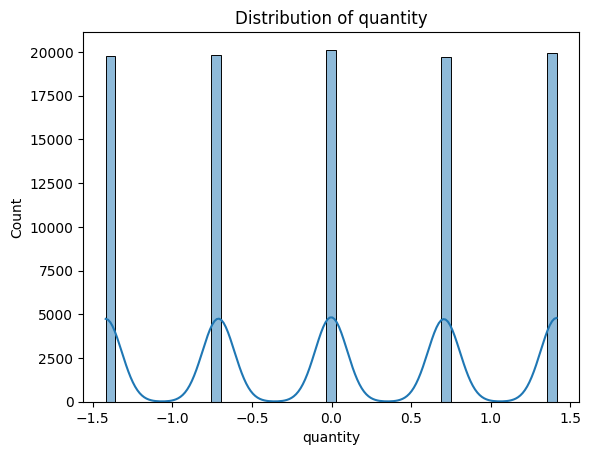

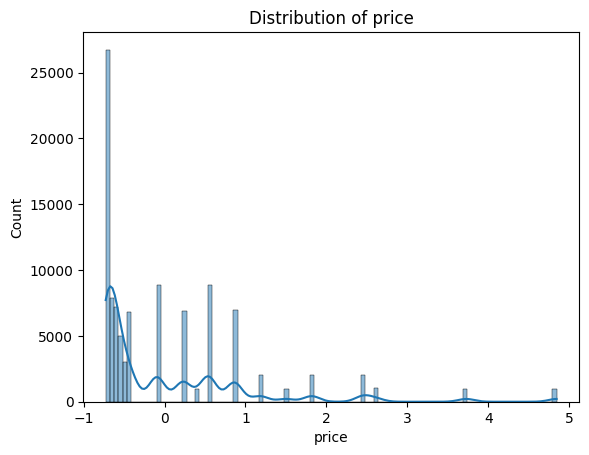

In [ ]:
print(sales_df_cleaned[num_cols].describe())  # Ortalama, std, min, max vb.

# Dağılım grafikleri (histogram ve KDE)
for col in num_cols:
    sns.histplot(sales_df_cleaned2[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

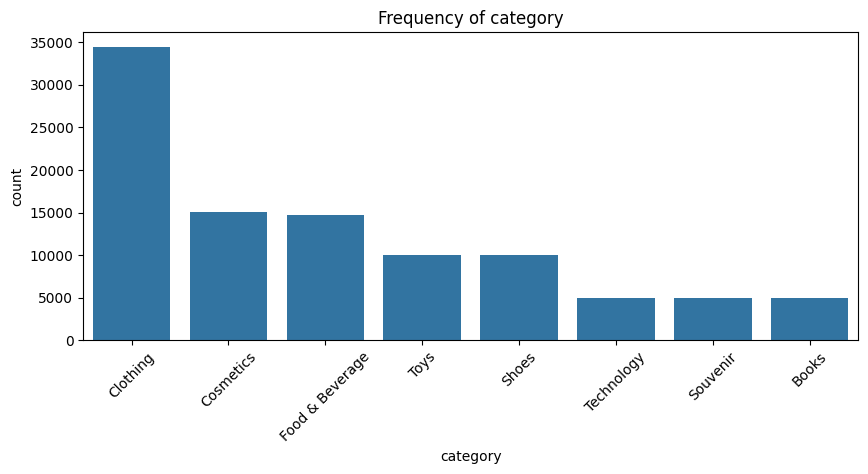

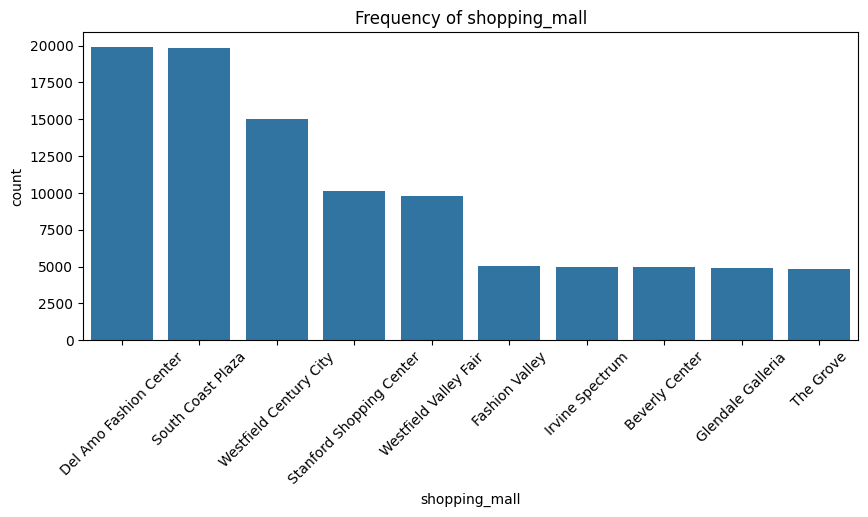

In [ ]:
cat_cols = ['category', 'shopping_mall']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=sales_df_cleaned2, x=col, order=sales_df_cleaned2[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Bu etapta df'leri birleştiriyoruz:

# customer + sales
merged_df = pd.merge(sales_df_cleaned2, customer_df_cleaned2, on='customer_id', how='inner')

# Sonuç
print(merged_df.head())



  invoice_no customer_id  category  quantity invoice date     price  \
0    I138884     C241288  Clothing  1.412968   05/08/2022  0.861625   
1    I317333     C111565     Shoes -0.002458   12/12/2021  1.180429   
2    I127801     C266599  Clothing -1.417884   09/11/2021 -0.413461   
3    I173702     C988172     Shoes  1.412968   05/16/2021  2.455536   
4    I337046     C189076     Books  0.705255   10/24/2021 -0.667857   

              shopping_mall  gender       age payment_method  
0         South Coast Plaza       1 -1.029123    Credit Card  
1            Beverly Center       0 -1.496122     Debit Card  
2    Westfield Century City       0 -1.562836           Cash  
3  Stanford Shopping Center       1  1.506015    Credit Card  
4         South Coast Plaza       1  0.638731           Cash  


In [ ]:
data_frame_cities_modified.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
import numpy as np
import pandas as pd

def extract_and_clean_value(value):
    if isinstance(value, (list, np.ndarray)):
        if len(value) == 0:
            return np.nan
        value = value[0]

    try:
        s_value = str(value).strip()
    except:
        return np.nan

    s_value = s_value.replace(',', '').replace('$', '').replace('%', '')

    try:
        return float(s_value)
    except ValueError:
        return np.nan

In [ ]:
# Assemble the final cleaned table
city_rows = []

for city_index, df in data_frame_cities_modified.items():
    # Identify column that contains the city values (ignore note columns)
    data_col = [col for col in df.columns if 'Value Note' not in col and col not in ['Fact', 'Fact Note']][0]

    # Clean city name
    city_name_cleaned = data_col.split(" city")[0].strip()

    # Extract and clean each target row's value
    values = []
    for row_label in target_rows:
        raw_val = df.loc[df["Fact"] == row_label, data_col].values
        cleaned_val = extract_and_clean_value(raw_val)
        values.append(cleaned_val)

    city_rows.append([city_name_cleaned] + values)
    print(city_rows[-1])

# Convert to final DataFrame
final_city_df = pd.DataFrame(city_rows, columns=["location"] + target_rows)

print(final_city_df.head())

['Glendale', 196527.0, 2.6, 89.0, 45.5, 84262.0]
['Irvine', 307682.0, 2.65, 96.6, 70.6, 129647.0]
['Los Angeles', 3899449.0, 2.64, 79.3, 37.8, 80366.0]
['Palo Alto', 68585.0, 2.55, 97.0, 82.4, 220408.0]
['San Diego', 1384429.0, 2.55, 90.2, 49.9, 104321.0]
['Santa Clara', 127863.0, 2.57, 94.0, 65.3, 173670.0]
['Torrance', 146946.0, 2.56, 94.9, 53.0, 113105.0]
['Costa Mesa', 112187.0, 2.6, 87.8, 43.6, 110073.0]
      location  Population estimates base, April 1, 2020, (V2024)  \
0     Glendale                                           196527.0   
1       Irvine                                           307682.0   
2  Los Angeles                                          3899449.0   
3    Palo Alto                                            68585.0   
4    San Diego                                          1384429.0   

   Persons per household, 2019-2023  \
0                              2.60   
1                              2.65   
2                              2.64   
3               

In [ ]:
import pandas as pd
import numpy as np

# Load the city dataframes from CSV files
# This dictionary maps the uploaded file names to cleaner city names for easier reference.
file_names = {
    'paloalto_city.csv': 'Palo Alto',
    'sandiego_city.csv': 'San Diego',
    'santa_clara_city.csv': 'Santa Clara',
    'torrance_city.csv': 'Torrance',
    'costamesa_city.csv': 'Costa Mesa',
    'glendale_city.csv': 'Glendale',
    'irvine_city.csv': 'Irvine',
    'losangeles_ciyt.csv': 'Los Angeles'
}

# Initialize an empty dictionary to store dataframes for each city.
dataframes_cities = {}
# Loop through the file names, read each CSV, and store it in the dictionary.
for file_name, city_name in file_names.items():
    try:
        df = pd.read_csv(file_name)
        dataframes_cities[city_name] = df
    except FileNotFoundError:
        # Print an error message if a file is not found.
        print(f"File not found: {file_name}")

# Initialize a dictionary to store the modified dataframes, containing only target rows.
data_frame_cities_modified = {}

# Define the list of specific rows (facts) that we are interested in extracting.
target_rows = ["Population estimates base, April 1, 2020, (V2024)",
               "Persons per household, 2019-2023",
               "High school graduate or higher, percent of persons age 25 years+, 2019-2023",
               "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023",
               "Median households income (in 2023 dollars), 2019-2023",
               ]

# Iterate through each city's dataframe in the `dataframes_cities` dictionary.
for city_name, df in dataframes_cities.items():
    # Strip any leading/trailing whitespace from the 'Fact' column values.
    # This ensures accurate matching with `target_rows`.
    df["Fact"] = df["Fact"].str.strip()

    # Filter the dataframe to keep only the rows where the 'Fact' column
    # is present in our `target_rows` list.
    row = df[df["Fact"].isin(target_rows)]

    # Store the filtered row(s) in the `data_frame_cities_modified` dictionary,
    # using the city name as the key.
    data_frame_cities_modified[city_name] = row

# Define a helper function to extract and clean the numerical values from the dataframe.
# This function handles percentages, currency, and comma-separated numbers.
def extract_and_clean_value(raw_val):
    # If the raw_val array is empty (no matching fact found), return NaN.
    if len(raw_val) == 0:
        return np.nan
    # Convert the value to a string and strip whitespace.
    val = str(raw_val[0]).strip()
    # Check if the value contains a '%' sign, remove it, and convert to float.
    if '%' in val:
        return float(val.replace('%', ''))
    # Check if the value contains a '$' sign, remove it and commas, and convert to float.
    elif '$' in val:
        return float(val.replace('$', '').replace(',', ''))
    # Check if the value contains commas but is otherwise a digit, remove commas, and convert to float.
    elif ',' in val and val.replace(',', '').isdigit():
        return float(val.replace(',', ''))
    # Check if the value is a digit (possibly with a decimal point) and convert to float.
    elif val.replace('.', '', 1).isdigit():
        return float(val)
    # If none of the above, return the original string value.
    return val

# Initialize an empty list to store the processed rows for the final DataFrame.
city_rows = []

# Iterate through each city's modified dataframe.
for city_name, df in data_frame_cities_modified.items():
    # Identify the column that contains the actual data values for the city.
    # This excludes 'Fact', 'Fact Note', and 'Value Note' columns.
    data_col = [col for col in df.columns if 'Value Note' not in col and col not in ['Fact', 'Fact Note']][0]

    # Initialize a list to store the cleaned values for the current city.
    values = []
    # Loop through each target row label.
    for row_label in target_rows:
        # Extract the raw value for the current fact from the data column.
        raw_val = df.loc[df["Fact"] == row_label, data_col].values
        # Clean the extracted value using the helper function.
        cleaned_val = extract_and_clean_value(raw_val)
        # Add the cleaned value to the list.
        values.append(cleaned_val)

    # Append a list containing the city name and its cleaned values to `city_rows`.
    city_rows.append([city_name] + values)

# Create the final Pandas DataFrame from the `city_rows` list.
# The columns will be 'location' followed by the `target_rows` labels.
final_city_df = pd.DataFrame(city_rows, columns=["location"] + target_rows)

# Display the head of the final DataFrame to show the result.
print(final_city_df.head(8))

# Save the final DataFrame to a CSV file for external use.
final_city_df.to_csv('final_city_data.csv', index=False)


      location  Population estimates base, April 1, 2020, (V2024)  \
0    Palo Alto                                            68585.0   
1    San Diego                                          1384429.0   
2  Santa Clara                                           127863.0   
3     Torrance                                           146946.0   
4   Costa Mesa                                           112187.0   
5     Glendale                                           196527.0   
6       Irvine                                           307682.0   
7  Los Angeles                                          3899449.0   

   Persons per household, 2019-2023  \
0                              2.55   
1                              2.55   
2                              2.57   
3                              2.56   
4                              2.60   
5                              2.60   
6                              2.65   
7                              2.64   

   High school graduate or

In [ ]:
final_city_df.head()

,location,"Population estimates base, April 1, 2020, (V2024)","Persons per household, 2019-2023","High school graduate or higher, percent of persons age 25 years+, 2019-2023","Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023","Median households income (in 2023 dollars), 2019-2023"
0,Palo Alto,68585.0,2.55,97.0,82.4,220408.0
1,San Diego,1384429.0,2.55,90.2,49.9,104321.0
2,Santa Clara,127863.0,2.57,94.0,65.3,173670.0
3,Torrance,146946.0,2.56,94.9,53.0,113105.0
4,Costa Mesa,112187.0,2.60,87.8,43.6,110073.0


In [ ]:
final_df = pd.merge(merged_df, mall_df, on='shopping_mall', how='right')

final_df.head(10)

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count
0,I138884,C241288,Clothing,1.412968,05/08/2022,0.861625,South Coast Plaza,1.0,-1.029123,Credit Card,1967,250000,Costa Mesa,270
1,I337046,C189076,Books,0.705255,10/24/2021,-0.667857,South Coast Plaza,1.0,0.638731,Cash,1967,250000,Costa Mesa,270
2,I326945,C283361,Clothing,-0.710171,08/22/2021,-0.094689,South Coast Plaza,1.0,1.105730,Credit Card,1967,250000,Costa Mesa,270
3,I336189,C555402,Clothing,-0.710171,03/06/2022,-0.094689,South Coast Plaza,1.0,1.572729,Credit Card,1967,250000,Costa Mesa,270
4,I252275,C313348,Technology,1.412968,10/26/2021,4.844781,South Coast Plaza,0.0,0.038303,Cash,1967,250000,Costa Mesa,270
5,I768348,C176727,Shoes,-0.002458,02/23/2022,1.180429,South Coast Plaza,1.0,-0.762266,Credit Card,1967,250000,Costa Mesa,270
6,I147062,C245456,Clothing,1.412968,06/21/2022,0.861625,South Coast Plaza,0.0,-0.028411,Credit Card,1967,250000,Costa Mesa,270
7,I106674,C204279,Clothing,-0.710171,02/27/2022,-0.094689,South Coast Plaza,0.0,0.705445,Cash,1967,250000,Costa Mesa,270
8,I296025,C120164,Shoes,-0.002458,04/21/2022,1.180429,South Coast Plaza,1.0,-0.161839,Credit Card,1967,250000,Costa Mesa,270
9,I258195,C213742,Toys,-0.710171,11/26/2021,-0.656087,South Coast Plaza,0.0,-0.028411,Cash,1967,250000,Costa Mesa,270


In [ ]:
final_final_df = pd.merge(final_df, final_city_df, on='location', how='inner')

final_final_df.head()

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count,"Population estimates base, April 1, 2020, (V2024)","Persons per household, 2019-2023","High school graduate or higher, percent of persons age 25 years+, 2019-2023","Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023","Median households income (in 2023 dollars), 2019-2023"
0,I138884,C241288,Clothing,1.412968,05/08/2022,0.861625,South Coast Plaza,1.0,-1.029123,Credit Card,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
1,I337046,C189076,Books,0.705255,10/24/2021,-0.667857,South Coast Plaza,1.0,0.638731,Cash,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
2,I326945,C283361,Clothing,-0.710171,08/22/2021,-0.094689,South Coast Plaza,1.0,1.105730,Credit Card,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
3,I336189,C555402,Clothing,-0.710171,03/06/2022,-0.094689,South Coast Plaza,1.0,1.572729,Credit Card,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
4,I252275,C313348,Technology,1.412968,10/26/2021,4.844781,South Coast Plaza,0.0,0.038303,Cash,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0


In [ ]:
import pandas as pd


df_encoded_copy = final_final_df.copy()


codes, uniques = pd.factorize(df_encoded_copy['category'])


df_encoded_copy['category'] = codes


category_mapping = {code: category for code, category in enumerate(uniques)}
print("--- Kategori - Sayı Eşleşmesi ---")
print(category_mapping)
print("\n" + "="*30 + "\n")


payment_map = {'Cash': 0, 'Credit Card': 1, 'Debit Card':2}
df_encoded_copy['payment_method'] = df_encoded_copy['payment_method'].map(payment_map)



print("--- Dönüşüm Sonrası Kopya DataFrame'in İlk 5 Satırı ---")
df_encoded_copy.head()

# bu işlem sonucunda categori değerleri numeric hale getirildi, cinsiyetler de numeric, payment method da numeric oldu artık


--- Kategori - Sayı Eşleşmesi ---
{0: 'Clothing', 1: 'Books', 2: 'Technology', 3: 'Shoes', 4: 'Toys', 5: 'Food & Beverage', 6: 'Cosmetics', 7: 'Souvenir'}


--- Dönüşüm Sonrası Kopya DataFrame'in İlk 5 Satırı ---


,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count,"Population estimates base, April 1, 2020, (V2024)","Persons per household, 2019-2023","High school graduate or higher, percent of persons age 25 years+, 2019-2023","Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023","Median households income (in 2023 dollars), 2019-2023"
0,I138884,C241288,0,1.412968,05/08/2022,0.861625,South Coast Plaza,1.0,-1.029123,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
1,I337046,C189076,1,0.705255,10/24/2021,-0.667857,South Coast Plaza,1.0,0.638731,0.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
2,I326945,C283361,0,-0.710171,08/22/2021,-0.094689,South Coast Plaza,1.0,1.105730,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
3,I336189,C555402,0,-0.710171,03/06/2022,-0.094689,South Coast Plaza,1.0,1.572729,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0
4,I252275,C313348,2,1.412968,10/26/2021,4.844781,South Coast Plaza,0.0,0.038303,0.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0


In [ ]:
# bazı rowlardaki verilier '.' yerine ',' ile ayrılmış bu yüzden int yerine string olarak anlaşılıyorlar. problem çözüldü.

def clean_numeric_column(series):
    return (
        series.astype(str)
        .str.replace(',', '', regex=False)
        .str.replace('%', '', regex=False)
        .str.replace('$', '', regex=False)
        .astype(float)
    )

columns_to_clean = [
    'Population estimates base, April 1, 2020, (V2024)',
    'Persons per household, 2019-2023',
    'High school graduate or higher, percent of persons age 25 years+, 2019-2023',
    "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023",
    'Median households income (in 2023 dollars), 2019-2023'
]

for col in columns_to_clean:
    final_final_df[col] = clean_numeric_column(final_final_df[col])


In [ ]:
final_final_df = final_final_df.dropna()

df_encoded_copy = df_encoded_copy.dropna()

df_encoded_copy_HDB = df_encoded_copy.copy()

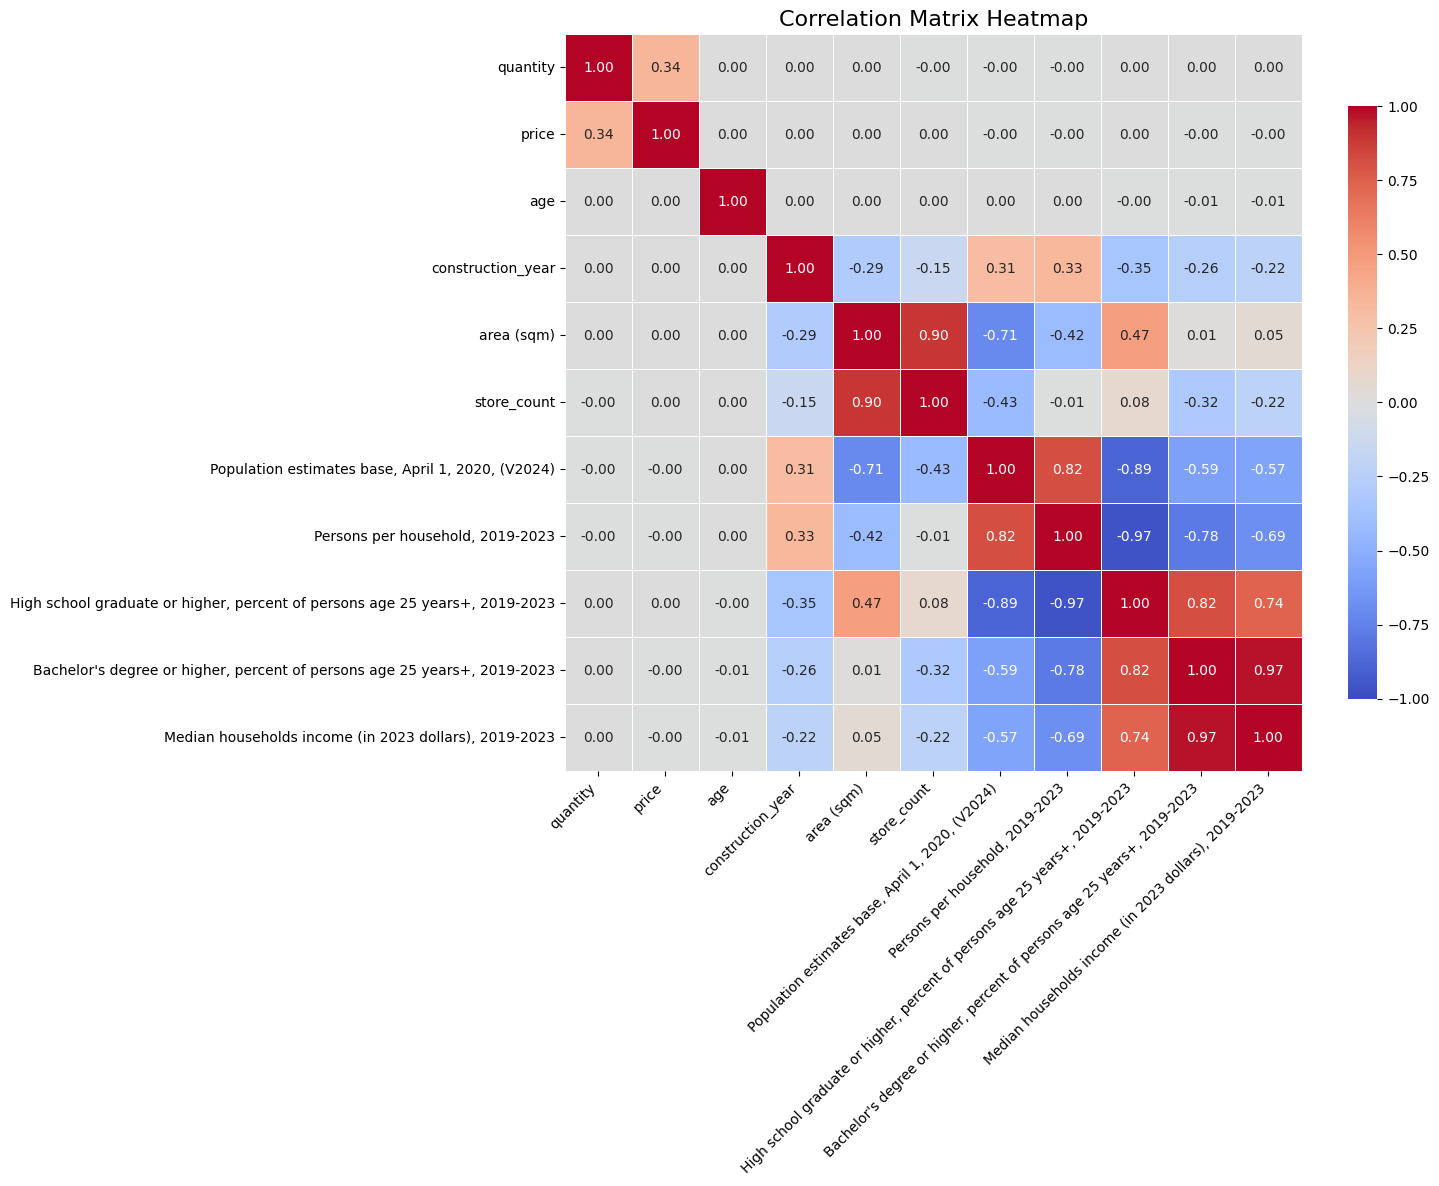

In [ ]:
# 1. Identify all numerical columns
numerical_cols = [
    'quantity',
    'price',
    'age',
    'construction_year',
    'area (sqm)',
    'store_count',
    'Population estimates base, April 1, 2020, (V2024)',
    'Persons per household, 2019-2023',
    'High school graduate or higher, percent of persons age 25 years+, 2019-2023',
    "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023",
    'Median households income (in 2023 dollars), 2019-2023'
]



# Create a new DataFrame with just the numeric features
numeric_df = df_encoded_copy[numerical_cols]

# Compute the covariance matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix,
            annot=True,           # Show correlation values
            fmt=".2f",            # Format values to 2 decimals
            cmap='coolwarm',      # Color theme
            vmin=-1, vmax=1,      # Fix the color scale
            linewidths=0.5,       # Lines between squares
            square=True,
            cbar_kws={"shrink": 0.8})  # Colorbar size

plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()





In [ ]:
null_rows = df_encoded_copy[df_encoded_copy.isnull().any(axis=1)]
print(null_rows)



Empty DataFrame
Columns: [invoice_no, customer_id, category, quantity, invoice date, price, shopping_mall, gender, age, payment_method, construction_year, area (sqm), location, store_count, Population estimates base, April 1, 2020, (V2024), Persons per household, 2019-2023, High school graduate or higher, percent of persons age 25 years+, 2019-2023, Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023, Median households income (in 2023 dollars), 2019-2023]
Index: []


In [ ]:
#Clustering:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(numeric_df.head())
scaled_data = scaler.fit_transform(numeric_df)

print(scaled_data)

   quantity     price       age  construction_year  area (sqm)  store_count  \
0  1.412968  0.861625 -1.029123               1967      250000          270   
1  0.705255 -0.667857  0.638731               1967      250000          270   
2 -0.710171 -0.094689  1.105730               1967      250000          270   
3 -0.710171 -0.094689  1.572729               1967      250000          270   
4  1.412968  4.844781  0.038303               1967      250000          270   

   Population estimates base, April 1, 2020, (V2024)  \
0                                           112187.0   
1                                           112187.0   
2                                           112187.0   
3                                           112187.0   
4                                           112187.0   

   Persons per household, 2019-2023  \
0                               2.6   
1                               2.6   
2                               2.6   
3                               

In [ ]:
"""from sklearn.cluster import KMeans
import pandas as pd

# Sadece sayısal kolonları içeren veriyi oluştur
numeric_df_cleaned = pd.DataFrame(scaled_data).dropna()

# Kümeleri uygula
kmeans = KMeans(n_clusters=7, random_state=42)
clusters = kmeans.fit_predict(numeric_df_cleaned)


# Küme numaralarını dataframe'e ekle
final_final_df['cluster'] = clusters
from sklearn.metrics import silhouette_score
# search for the best K means score
for k in range(2, 30):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(numeric_df_cleaned)
    score = silhouette_score(numeric_df_cleaned, preds)
    print(f"k={k} → Silhouette Score: {score:.4f}")"""

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


numeric_df_cleaned = pd.DataFrame(scaled_data).dropna()

wcss = []  # Within-cluster sum of squares
sil_scores = []

# Kümeleri uygula
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(numeric_df_cleaned)

preds = kmeans.fit_predict(numeric_df_cleaned)
# her seferinde çalışmaması için testler yapıldıktan sonra comment out ettim
#wcss.append(kmeans.inertia_)  # Inertia is WCSS
#sil_scores.append(silhouette_score(numeric_df_cleaned, preds))

#print(f"k={7} → Silhouette Score: {silhouette_score(numeric_df_cleaned, preds):.4f}")


# Küme numaralarını dataframe'e ekle
df_encoded_copy['cluster'] = clusters
"""
from sklearn.metrics import silhouette_score
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(numeric_df_cleaned)

    wcss.append(km.inertia_)  # Inertia is WCSS
    sil_scores.append(silhouette_score(numeric_df_cleaned, preds))

    print(f"k={k} → Silhouette Score: {silhouette_score(numeric_df_cleaned, preds):.4f}")
"""


"""
# Plot Elbow curve
plt.figure(figsize=(12, 5))

# Elbow plot (WCSS)
plt.subplot(1, 2, 1)
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")

# Silhouette score plot
plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k")

plt.tight_layout()
plt.show()
"""




'\n# Plot Elbow curve\nplt.figure(figsize=(12, 5))\n\n# Elbow plot (WCSS)\nplt.subplot(1, 2, 1)\nplt.plot(K, wcss, marker=\'o\')\nplt.xlabel("Number of Clusters (k)")\nplt.ylabel("WCSS (Inertia)")\nplt.title("Elbow Method for Optimal k")\n\n# Silhouette score plot\nplt.subplot(1, 2, 2)\nplt.plot(K, sil_scores, marker=\'o\', color=\'green\')\nplt.xlabel("Number of Clusters (k)")\nplt.ylabel("Silhouette Score")\nplt.title("Silhouette Scores for k")\n\nplt.tight_layout()\nplt.show()\n'

k=2 → Silhouette Score: 0.3681
k=3 → Silhouette Score: 0.3418
k=4 → Silhouette Score: 0.3017
k=5 → Silhouette Score: 0.3046
k=6 → Silhouette Score: 0.3435
k=7 → Silhouette Score: 0.3495
k=8 → Silhouette Score: 0.3502
k=9 → Silhouette Score: 0.3371
k=10 → Silhouette Score: 0.3171
k=11 → Silhouette Score: 0.3168
k=12 → Silhouette Score: 0.3096
k=13 → Silhouette Score: 0.2817
k=14 → Silhouette Score: 0.2825
k=15 → Silhouette Score: 0.2798
k=16 → Silhouette Score: 0.2815
k=17 → Silhouette Score: 0.2779
k=18 → Silhouette Score: 0.2829
k=19 → Silhouette Score: 0.2870
k=20 → Silhouette Score: 0.2881
k=21 → Silhouette Score: 0.2747
k=22 → Silhouette Score: 0.2762
k=23 → Silhouette Score: 0.2780
k=24 → Silhouette Score: 0.2814
k=25 → Silhouette Score: 0.2810
k=26 → Silhouette Score: 0.2830
k=27 → Silhouette Score: 0.2870
k=28 → Silhouette Score: 0.2941
k=29 → Silhouette Score: 0.2963

Calculating WCSS for each k...
k=2, WCSS=678324.72
k=3, WCSS=495574.81
k=4, WCSS=431928.94
k=5, WCSS=382901.05
k=6, WCSS=337203.68
k=7, WCSS=300598.20
k=8, WCSS=269545.92
k=9, WCSS=255501.40
k=10, WCSS=241782.78
k=11, WCSS=229521.89
k=12, WCSS=218516.29
k=13, WCSS=210972.61
k=14, WCSS=199214.16

Generating plot...


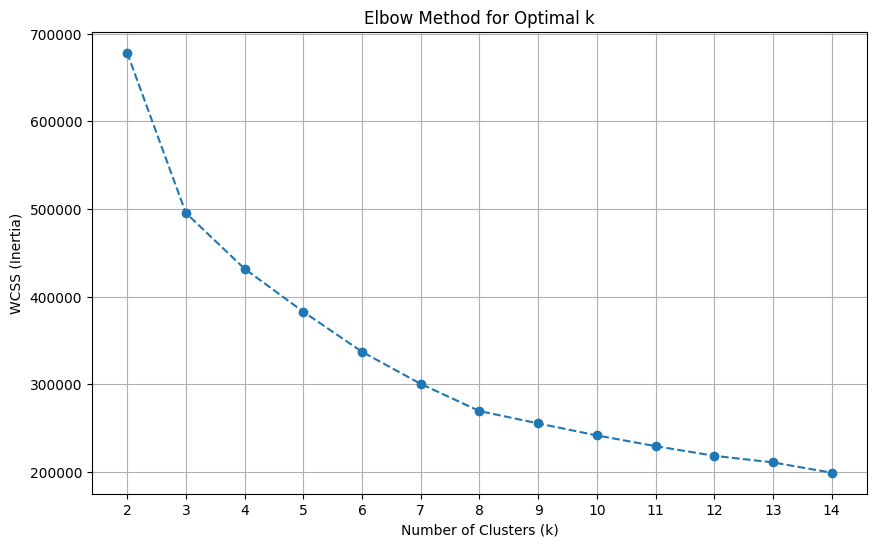

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Ensure no null rows exist
numeric_df_cleaned = pd.DataFrame(scaled_data).dropna()


K = range(2, 15)


wcss = []

# 4. Loop through each k value, run KMeans, and store the WCSS
print("Calculating WCSS for each k...")
for k in K:
    # Initialize the KMeans model for the current k
    km = KMeans(n_clusters=k, random_state=42, n_init=10)

    # Fit the model to the data
    km.fit(numeric_df_cleaned)


    wcss.append(km.inertia_)
    print(f"k={k}, WCSS={km.inertia_:.2f}")

# 5. Plot the Elbow curve
print("\nGenerating plot...")
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.xticks(K) # Ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()


Variance explained by each of the 3 principal components: [0.40662868 0.20221575 0.12223746]
Total variance explained by the 3 principal components: 73.11%
------------------------------


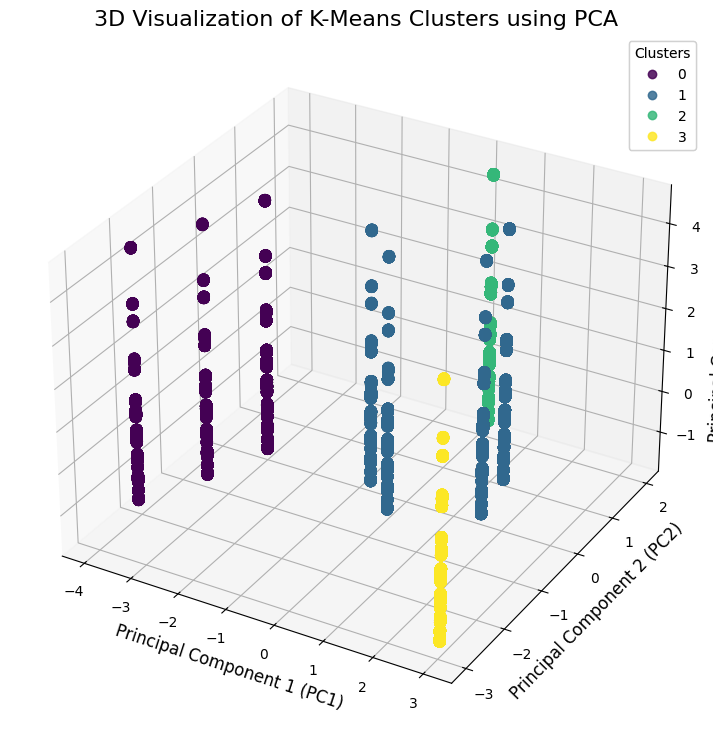

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



## 1. Apply PCA
# Initialize PCA with 3 components
pca = PCA(n_components=3)

# Fit PCA to the same data used for clustering and transform it
principal_components = pca.fit_transform(numeric_df_cleaned)


## 2. Print the Explained Variance
# Calculate the total variance explained by the 3 components
total_explained_variance = sum(pca.explained_variance_ratio_) * 100

print(f"Variance explained by each of the 3 principal components: {pca.explained_variance_ratio_}")
print(f"Total variance explained by the 3 principal components: {total_explained_variance:.2f}%")
print("-" * 30) # Separator


## 3. Visualize the Clusters with PCA
# Create a new DataFrame with the 3 principal components and the cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = clusters

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Create a scatter plot, coloring points by their assigned cluster
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['cluster'], cmap='viridis', s=60, alpha=0.8)

# Add labels and title for clarity
ax.set_xlabel('Principal Component 1 (PC1)', fontsize=12)
ax.set_ylabel('Principal Component 2 (PC2)', fontsize=12)
ax.set_zlabel('Principal Component 3 (PC3)', fontsize=12)
ax.set_title('3D Visualization of K-Means Clusters using PCA', fontsize=16)

# Create a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [ ]:
# 1. Get the total number of rows for context
total_rows = len(numeric_df)
print(f"Total number of rows: {total_rows}")

# 2. Calculate the number of unique rows
#    .drop_duplicates() creates a temporary DataFrame with all duplicate rows removed.
#    len() then counts how many rows are left.
num_unique_rows = len(numeric_df.drop_duplicates())

# 3. Print the result
print(f"Number of unique rows: {num_unique_rows}") #this test was done to proove the low variance of the given data

Total number of rows: 94349
Number of unique rows: 16745


In [ ]:
import pandas as pd


print("--- Data Diagnostics ---")
print(f"Total rows in the DataFrame: {len(numeric_df_cleaned)}")

num_duplicates = numeric_df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

num_unique_rows = len(numeric_df_cleaned.drop_duplicates())
print(f"Number of unique rows (distinct data points): {num_unique_rows}")
print("\n" + "="*50 + "\n")


print("--- Showing a Sample of the Duplicate Rows ---")
print("Notice how several of the rows below are completely identical to each other.")

is_duplicate_mask = numeric_df_cleaned.duplicated(keep=False)

duplicate_rows_df = numeric_df_cleaned[is_duplicate_mask]

sorted_duplicates = duplicate_rows_df.sort_values(by=list(duplicate_rows_df.columns))

print(sorted_duplicates.head(10))



--- Data Diagnostics ---
Total rows in the DataFrame: 94349
Number of duplicate rows: 77604
Number of unique rows (distinct data points): 16745


--- Showing a Sample of the Duplicate Rows ---
Notice how several of the rows below are completely identical to each other.
             0        1         2         3         4         5         6   \
59532 -1.418455 -0.72719 -1.696676 -1.165968 -1.050603 -1.617996 -0.677328   
62954 -1.418455 -0.72719 -1.696676 -1.165968 -1.050603 -1.617996 -0.677328   
69461 -1.418455 -0.72719 -1.696676 -1.165968 -1.050603 -1.617996 -0.677328   
74746 -1.418455 -0.72719 -1.696676 -0.737740  0.813721  0.262778 -0.629676   
75115 -1.418455 -0.72719 -1.696676 -0.737740  0.813721  0.262778 -0.629676   
75621 -1.418455 -0.72719 -1.696676 -0.737740  0.813721  0.262778 -0.629676   
77823 -1.418455 -0.72719 -1.696676 -0.737740  0.813721  0.262778 -0.629676   
78691 -1.418455 -0.72719 -1.696676 -0.737740  0.813721  0.262778 -0.629676   
78905 -1.418455 -0.72719 -1.

In [ ]:
"""from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce features to 2D for plotting
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(scaled_data)  # use imputed & scaled data


print(numeric_df.head())"""

'from sklearn.decomposition import PCA\nimport matplotlib.pyplot as plt\n\n# Reduce features to 2D for plotting\npca = PCA(n_components=3)\nreduced_data = pca.fit_transform(scaled_data)  # use imputed & scaled data\n\n\nprint(numeric_df.head())'

                                                         PC1       PC2  \
quantity                                            0.001945 -0.000067   
price                                               0.000695  0.002600   
age                                                -0.002689  0.004235   
construction_year                                  -0.204041 -0.105034   
area (sqm)                                          0.246662  0.563205   
store_count                                         0.075354  0.640542   
Population estimates base, April 1, 2020, (V2024)  -0.428262 -0.202474   
Persons per household, 2019-2023                   -0.442563  0.060605   
High school graduate or higher, percent of pers...  0.461684 -0.031266   
Bachelor's degree or higher, percent of persons...  0.396128 -0.346293   
Median households income (in 2023 dollars), 201...  0.377485 -0.309653   

                                                         PC3  
quantity                                        

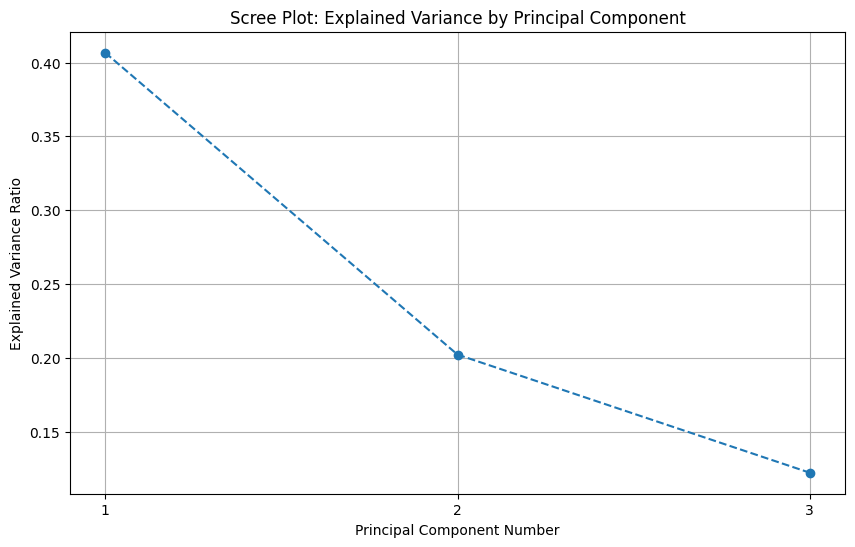

In [ ]:
pca_components = pd.DataFrame(pca.components_, columns=numeric_df.columns, index=['PC1', 'PC2','PC3'])
print(pca_components.T)

# 1. Print the explained variance ratio for each component
print("\n--- Explained Variance Ratio for Each Component ---")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.4f} ({(ratio*100):.2f}%)")

# 2. Print the cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("\n--- Cumulative Explained Variance Ratio ---")
for i, cumulative_ratio in enumerate(cumulative_variance):
    print(f"PC1-{i+1}: {cumulative_ratio:.4f} ({(cumulative_ratio*100):.2f}%)")

# 3. Plot the Explained Variance (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot: Explained Variance by Principal Component')
plt.xlabel('Principal Component Number')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()




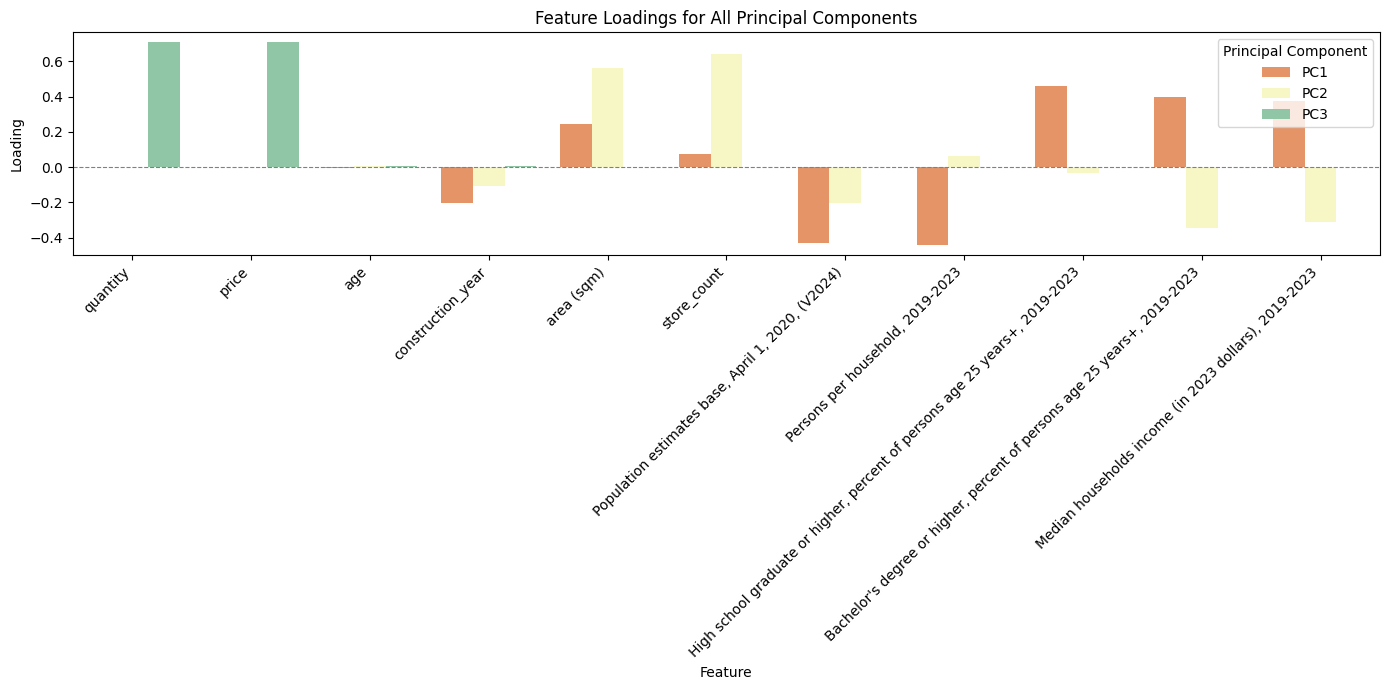

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose so features are rows and PCs are columns
pca_long = pca_components.T.reset_index().melt(id_vars='index', var_name='Principal Component', value_name='Loading')
pca_long.rename(columns={'index': 'Feature'}, inplace=True)

# Plot: grouped barplot per feature
plt.figure(figsize=(14, 7))
sns.barplot(data=pca_long, x='Feature', y='Loading', hue='Principal Component', palette='Spectral')

plt.title('Feature Loadings for All Principal Components')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()


In [ ]:




# 1. Create the DataFrame to link principal components with their cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df['cluster'] = clusters # This will now work because lengths match

# 2. Group by the 'cluster' column and calculate the mean for each principal component
cluster_centers_in_pca_space = pca_df.groupby('cluster')[['PC1', 'PC2', 'PC3']].mean()

# 3. Print the resulting table of cluster centers
print("--- Average Principal Component Values for Each Cluster ---")
print(cluster_centers_in_pca_space)


--- Average Principal Component Values for Each Cluster ---
              PC1       PC2       PC3
cluster                              
0       -3.177337 -0.717713 -0.001073
1        1.097537  0.225093  0.006590
2        0.216026  1.978871 -0.005805
3        3.037641 -2.992143 -0.011808


In [ ]:
import pandas as pd

numerical_cols = [
    'quantity',
    'price',
    'age',
    'construction_year',
    'area (sqm)',
    'store_count',
    'Population estimates base, April 1, 2020, (V2024)',
    'Persons per household, 2019-2023',
    'High school graduate or higher, percent of persons age 25 years+, 2019-2023',
    "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023",
    'Median households income (in 2023 dollars), 2019-2023'
]




data_with_clusters = numeric_df_cleaned.copy()

data_with_clusters['cluster'] = clusters


cluster_attribute_means = data_with_clusters.groupby('cluster').mean()


print("--- Average Attribute Values for Each Cluster ---")
print(cluster_attribute_means)

print("\n--- Transposed View (Attributes as Rows) ---")
print(cluster_attribute_means.T)



--- Average Attribute Values for Each Cluster ---
                0         1         2         3         4         5         6  \
cluster                                                                         
0       -0.004327 -0.004220  0.005037  0.459151 -1.156260 -0.669191  1.652294   
1        0.004405  0.003337 -0.001308  0.123629  0.434259  0.113226 -0.532678   
2       -0.003647  0.002081  0.004000 -0.223867  1.113345  1.438262 -0.650813   
3        0.000456 -0.006813 -0.014981 -1.165968 -1.050603 -1.617996 -0.677328   

                7         8         9        10  
cluster                                          
0        1.435752 -1.482485 -0.959671 -0.901698  
1       -0.723269  0.688687  0.276961  0.082693  
2        0.266532 -0.168730 -0.535373 -0.220989  
3       -1.194993  1.253215  2.303031  2.307235  

--- Transposed View (Attributes as Rows) ---
cluster         0         1         2         3
0       -0.004327  0.004405 -0.003647  0.000456
1       -0.004220  0.

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Yüzdeleri ve $ işaretlerini düzeltiyoruz (eğer string ise)
def clean_percent(x):
    if isinstance(x, str) and "%" in x:
        return float(x.replace("%", ""))
    return x

def clean_dollar(x):
    if isinstance(x, str) and "$" in x:
        return float(x.replace("$", "").replace(",", ""))
    return x
yedek_final_df = final_final_df.copy()
# Dönüştür
final_final_df["Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023"] = final_final_df["Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023"].apply(clean_percent)
final_final_df["Median households income (in 2023 dollars), 2019-2023"] = final_final_df["Median households income (in 2023 dollars), 2019-2023"].apply(clean_dollar)

# Grup ve sayısal kolonları tanımla
group_columns = ["shopping_mall", "gender", "category", "payment_method"]
numeric_columns = ["price", "quantity", "age",
                   "Median households income (in 2023 dollars), 2019-2023",
                   "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023"]

print("=== ANOVA Test Sonuçları ===\n")
for group_col in group_columns:
    print(f"\n--- Grup: {group_col} ---")
    for num_col in numeric_columns:
        # Her grup için ayrı sample listesi oluştur
        groups = final_final_df[group_col].unique()
        samples = [final_final_df[final_final_df[group_col] == g][num_col].dropna() for g in groups]

        # ANOVA uygula
        if all(len(s) > 1 for s in samples):  # Her grubun en az 2 verisi olmalı
            stat, p = f_oneway(*samples)
            print(f"{num_col}: F = {stat:.2f}, p = {p:.4f}")
        else:
            print(f"{num_col}: Yetersiz veri")





=== ANOVA Test Sonuçları ===


--- Grup: shopping_mall ---
price: F = 0.59, p = 0.7861
quantity: F = 0.43, p = 0.9015
age: F = 0.50, p = 0.8587
Median households income (in 2023 dollars), 2019-2023: F = inf, p = 0.0000


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023: F = inf, p = 0.0000

--- Grup: gender ---
price: F = 0.38, p = 0.5383
quantity: F = 0.03, p = 0.8594
age: F = 0.80, p = 0.3713
Median households income (in 2023 dollars), 2019-2023: F = 1.75, p = 0.1854
Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023: F = 1.11, p = 0.2921

--- Grup: category ---
price: F = 35157.52, p = 0.0000
quantity: F = 0.46, p = 0.8643
age: F = 0.51, p = 0.8245
Median households income (in 2023 dollars), 2019-2023: F = 2.08, p = 0.0417
Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023: F = 1.81, p = 0.0810

--- Grup: payment_method ---
price: F = 0.25, p = 0.7783
quantity: F = 0.67, p = 0.5097
age: F = 0.16, p = 0.8554
Median households income (in 2023 dollars), 2019-2023: F = 1.09, p = 0.3346
Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023: F = 1.23, p = 0.2913


In [ ]:
"""from scipy.stats import f_oneway

print("=== K-means Sonrası ANOVA Test Sonuçları ===\n")

numeric_cols = numeric_df.select_dtypes(include='number').columns.tolist()
k = numeric_df['Cluster'].nunique()

for col in numeric_cols:
    if col == 'Cluster':
        continue
    groups = [numeric_df.loc[numeric_df['Cluster'] == i, col].dropna() for i in range(k)]

    if all(len(g) > 1 for g in groups):
        F, p = f_oneway(*groups)
        print(f"{col} vs Cluster: F = {F:.4f}, p = {p:.4g}")
    else:
        print(f"{col} vs Cluster: Yetersiz veri")"""


'from scipy.stats import f_oneway\n\nprint("=== K-means Sonrası ANOVA Test Sonuçları ===\n")\n\nnumeric_cols = numeric_df.select_dtypes(include=\'number\').columns.tolist()\nk = numeric_df[\'Cluster\'].nunique()\n\nfor col in numeric_cols:\n    if col == \'Cluster\':\n        continue\n    groups = [numeric_df.loc[numeric_df[\'Cluster\'] == i, col].dropna() for i in range(k)]\n\n    if all(len(g) > 1 for g in groups):\n        F, p = f_oneway(*groups)\n        print(f"{col} vs Cluster: F = {F:.4f}, p = {p:.4g}")\n    else:\n        print(f"{col} vs Cluster: Yetersiz veri")'

In [ ]:
"""import pandas as pd
import numpy as np
from scipy.stats import f_oneway, levene, bartlett
from sklearn.cluster import KMeans

# PCA'dan gelen skorları DataFrame'e çevir
pca_scores = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])

# Eğer cluster yoksa, oluştur
if 'Cluster' not in numeric_df.columns:
    kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)
    numeric_df['Cluster'] = kmeans.fit_predict(reduced_data)

# Cluster etiketlerini PCA skorlarına ekle
pca_scores['Cluster'] = numeric_df['Cluster'].values

# ANOVA testleri
print("=== PCA Bileşenleri için Cluster Gruplarına Göre ANOVA ve Varyans Eşitliği Testleri ===\n")

for pc in pca_scores.columns[:-1]:  # 'Cluster' hariç tüm PC bileşenleri
    print(f"--- {pc} ---")

    # Her cluster için değer gruplarını al
    groups = [pca_scores.loc[pca_scores['Cluster'] == cluster, pc].dropna()
              for cluster in sorted(pca_scores['Cluster'].unique())]

    # Varyans homojenliği testleri
    try:
        stat_levene, p_levene = levene(*groups)
        stat_bartlett, p_bartlett = bartlett(*groups)
        levene_result = "(Varyans eşitliği sağlanıyor)" if p_levene > 0.05 else "(Varyans eşitliği sağlanmıyor)"
        bartlett_result = "(Varyans eşitliği sağlanıyor)" if p_bartlett > 0.05 else "(Varyans eşitliği sağlanmıyor)"
    except Exception as e:
        stat_levene, p_levene = np.nan, np.nan
        stat_bartlett, p_bartlett = np.nan, np.nan
        levene_result = bartlett_result = f"Test başarısız: {e}"

    # ANOVA
    if all(len(g) > 1 for g in groups):
        F_stat, p_anova = f_oneway(*groups)
        anova_result = "(Anlamlı fark var)" if p_anova < 0.05 else "(Anlamlı fark yok)"
    else:
        F_stat, p_anova = np.nan, np.nan
        anova_result = "Yetersiz veri"

    # Yazdır
    print(f"Levene testi: stat={stat_levene:.4f}, p={p_levene:.4g} {levene_result}")
    print(f"Bartlett testi: stat={stat_bartlett:.4f}, p={p_bartlett:.4g} {bartlett_result}")
    print(f"ANOVA testi: F = {F_stat:.4f}, p = {p_anova:.4g} {anova_result}\n")
"""

'import pandas as pd\nimport numpy as np\nfrom scipy.stats import f_oneway, levene, bartlett\nfrom sklearn.cluster import KMeans\n\n# PCA\'dan gelen skorları DataFrame\'e çevir\npca_scores = pd.DataFrame(reduced_data, columns=[f\'PC{i+1}\' for i in range(reduced_data.shape[1])])\n\n# Eğer cluster yoksa, oluştur\nif \'Cluster\' not in numeric_df.columns:\n    kmeans = KMeans(n_clusters=7, random_state=42, n_init=10)\n    numeric_df[\'Cluster\'] = kmeans.fit_predict(reduced_data)\n\n# Cluster etiketlerini PCA skorlarına ekle\npca_scores[\'Cluster\'] = numeric_df[\'Cluster\'].values\n\n# ANOVA testleri\nprint("=== PCA Bileşenleri için Cluster Gruplarına Göre ANOVA ve Varyans Eşitliği Testleri ===\n")\n\nfor pc in pca_scores.columns[:-1]:  # \'Cluster\' hariç tüm PC bileşenleri\n    print(f"--- {pc} ---")\n\n    # Her cluster için değer gruplarını al\n    groups = [pca_scores.loc[pca_scores[\'Cluster\'] == cluster, pc].dropna()\n              for cluster in sorted(pca_scores[\'Cluster\'].u

In [ ]:
import hdbscan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# --- HDBSCAN Clustering ---
# The main parameter for HDBSCAN is `min_cluster_size`.
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=1000
)

cluster_labels = clusterer.fit_predict(scaled_data)


df_encoded_copy_HDB["cluster"] = cluster_labels

# Number of clusters (excluding noise points, labeled as -1)
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# Number of noise points
n_noise = list(cluster_labels).count(-1)

print(f"Clusters found = {n_clusters}, Noise points = {n_noise}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters found = 9, Noise points = 3267


-- DBSCAN Clustering Results ---
eps=0.10: Clusters found = 441, Noise points = 828
eps=0.20: Clusters found = 263, Noise points = 194
eps=0.30: Clusters found = 185, Noise points = 17
eps=0.40: Clusters found = 164, Noise points = 3
eps=0.50: Clusters found = 153, Noise points = 0
eps=0.60: Clusters found = 144, Noise points = 0
eps=0.70: Clusters found = 135, Noise points = 0
eps=0.80: Clusters found = 63, Noise points = 0
eps=0.90: Clusters found = 63, Noise points = 0
eps=1.00: Clusters found = 36, Noise points = 0
eps=1.10: Clusters found = 27, Noise points = 0
eps=1.20: Clusters found = 27, Noise points = 0
eps=1.30: Clusters found = 27, Noise points = 0
eps=1.40: Clusters found = 9, Noise points = 0
eps=1.50: Clusters found = 9, Noise points = 0
eps=1.60: Clusters found = 9, Noise points = 0
eps=1.70: Clusters found = 9, Noise points = 0
eps=1.80: Clusters found = 8, Noise points = 0
eps=1.90: Clusters found = 7, Noise points = 0


--- Reducing dimensionality for plotting using UMAP ---


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.11/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisati

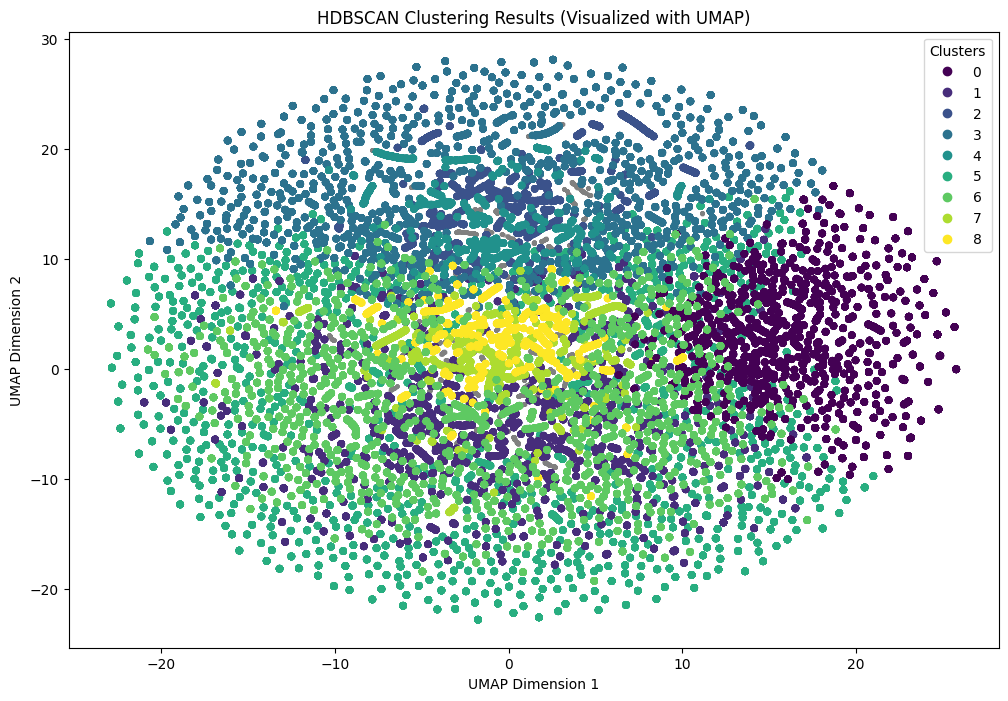

In [ ]:
#!pip install umap-learn matplotlib
import hdbscan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap

# --- Visualization using UMAP ---
print("\n--- Reducing dimensionality for plotting using UMAP ---")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 1. Reduce the high-dimensional data to 2 dimensions
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(scaled_data)

# 2. Create a DataFrame for easy plotting
plot_data = pd.DataFrame(embedding, columns=['x', 'y'])
plot_data['labels'] = cluster_labels

# 3. Plot the results
plt.figure(figsize=(12, 8))
plt.title('HDBSCAN Clustering Results (Visualized with UMAP)')

# Separate noise points from clustered points
noise_points = plot_data[plot_data['labels'] == -1]
clustered_points = plot_data[plot_data['labels'] != -1]

# Plot noise points as grey and smaller
plt.scatter(noise_points['x'], noise_points['y'], color='grey', s=5, alpha=0.5, label='Noise')

# Plot clustered points with colors based on their labels
scatter = plt.scatter(clustered_points['x'], clustered_points['y'], c=clustered_points['labels'], s=20, cmap='viridis')

plt.legend(*scatter.legend_elements(), title='Clusters')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

plt.show()

In [ ]:
import pandas as pd


hdb_data_with_clusters = numeric_df_cleaned.copy()

print(len(cluster_labels))
hdb_data_with_clusters['cluster'] = cluster_labels

print(hdb_data_with_clusters['cluster'].value_counts())

numerical_cols = [
    'quantity',
    'price',
    'age',
    'construction_year',
    'area (sqm)',
    'store_count',
    'Population estimates base, April 1, 2020, (V2024)',
    'Persons per household, 2019-2023',
    'High school graduate or higher, percent of persons age 25 years+, 2019-2023',
    "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023",
    'Median households income (in 2023 dollars), 2019-2023',
    'cluster'
]

hdb_data_with_clusters.columns = numerical_cols


cluster_profiles = hdb_data_with_clusters.groupby('cluster').mean()
cluster_profiles.head(10)


94349
cluster
 6    19598
 5    19475
 3    14480
 0    10145
 1     9579
 7     4505
 2     4482
 4     4462
 8     4356
-1     3267
Name: count, dtype: int64


,quantity,price,age,construction_year,area (sqm),store_count,"Population estimates base, April 1, 2020, (V2024)","Persons per household, 2019-2023","High school graduate or higher, percent of persons age 25 years+, 2019-2023","Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023","Median households income (in 2023 dollars), 2019-2023"
cluster,,,,,,,,,,,
-1,0.894898,3.009473,0.028727,0.541228,-0.462581,-0.354360,0.423628,0.324957,-0.443370,-0.446477,-0.528447
0,0.000317,-0.007291,-0.014815,-1.165968,-1.050603,-1.617996,-0.677328,-1.194993,1.253215,2.303031,2.307235
1,-0.013690,-0.085024,-0.004386,1.403398,0.613972,0.497875,-0.641280,-0.610383,0.789537,1.052085,1.236277
2,-0.049343,-0.190716,0.011675,2.773726,-2.115931,-1.617996,1.652294,1.435752,-1.482485,-0.959671,-0.901698
3,-0.040639,-0.132591,0.003738,-0.480804,-0.834208,-0.207416,1.652294,1.435752,-1.482485,-0.959671,-0.901698
4,-0.086039,-0.259983,0.001365,1.060815,-1.200415,-1.147803,1.652294,1.435752,-1.482485,-0.959671,-0.901698
5,-0.023180,-0.072978,0.002523,-0.223867,1.113345,1.438262,-0.650813,0.266532,-0.168730,-0.535373,-0.220989
6,-0.010880,-0.065639,-0.001675,-0.737740,0.813721,0.262778,-0.629676,-0.902688,0.928641,0.152282,-0.151514
7,-0.101743,-0.261004,0.010474,0.632588,-0.368127,-0.677609,0.122862,-1.194993,0.202212,-0.074498,-0.352791


In [ ]:
import pandas as pd
from IPython.display import display

category_mapping = {
    0: 'Clothing', 1: 'Books', 2: 'Technology', 3: 'Shoes', 4: 'Toys',
    5: 'Food & Beverage', 6: 'Cosmetics', 7: 'Souvenir'
}


try:

    income_column_name = 'Median households income (in 2023 dollars), 2019-2023'
    cluster_incomes = hdb_data_with_clusters.groupby('cluster')[income_column_name].mean()
    print("✅ Her küme için ortalama gelirler hesaplandı.")


    analysis_df = pd.DataFrame({
        'cluster': hdb_data_with_clusters['cluster'],
        'category': df_encoded_copy_HDB['category']
    })
    print("✅ Kategori verileri başarılı bir şekilde birleştirildi.")

    category_distribution = pd.crosstab(
        analysis_df['cluster'],
        analysis_df['category'],
        normalize='index'
    )

    category_distribution['Median Income'] = cluster_incomes
    print("✅ Ortalama gelir sütunu tabloya eklendi.")

    if -1 in category_distribution.index:
        category_distribution = category_distribution.drop(-1)
        print("ℹ️ Gürültü kümesi (-1) tablodan çıkarıldı.")
    category_distribution = category_distribution.rename(columns=category_mapping)

    print("\n\n📊 --- HDBSCAN Kümeleri: Kategori Dağılımı ve Ortalama Gelir ---")

    # Formatlama için bir sözlük oluşturalım
    # Gelir sütununu para birimi, diğerlerini yüzde olarak formatlayacağız
    formatter = {'Median Income': '${:,.2f}'}
    for col in category_distribution.columns:
        if col != 'Median Income':
            formatter[col] = '{:.2%}'

    # Stilize edilmiş tabloyu oluşturalım
    styled_table = category_distribution.style.format(formatter) \
        .set_caption("Her Kümenin Kategori Dağılım Yüzdeleri ve Ortalama Geliri (Gürültü Hariç)") \
        .background_gradient(cmap='viridis', axis=1, subset=pd.IndexSlice[:, :'Souvenir']) # Sadece kategori sütunlarını renklendir

    # DataFrame'i istenen değişkende tutalım
    tablo_df = category_distribution

    # Stilize edilmiş tabloyu ekrana basalım
    display(styled_table)

except Exception as e:
    print(f"❌ Beklenmedik bir hata oluştu: {e}")

print("\n\n--- 'tablo_df.head()' Çıktısı ---")
display(tablo_df.head(10))

✅ Her küme için ortalama gelirler hesaplandı.
✅ Kategori verileri başarılı bir şekilde birleştirildi.
✅ Ortalama gelir sütunu tabloya eklendi.
ℹ️ Gürültü kümesi (-1) tablodan çıkarıldı.


📊 --- HDBSCAN Kümeleri: Kategori Dağılımı ve Ortalama Gelir ---


category,Clothing,Books,Technology,Shoes,Toys,Food & Beverage,Cosmetics,Souvenir,Median Income
cluster,,,,,,,,,
0.000000,34.68%,4.69%,4.56%,10.57%,10.17%,14.91%,15.18%,5.23%,$2.31
1.000000,34.96%,4.80%,3.14%,10.42%,10.59%,15.53%,15.19%,5.37%,$1.24
2.000000,36.59%,5.27%,1.72%,8.21%,10.33%,15.44%,16.93%,5.51%,$-0.90
3.000000,36.35%,5.19%,2.49%,9.33%,10.46%,15.48%,15.63%,5.08%,$-0.90
4.000000,37.20%,5.65%,1.17%,5.18%,11.90%,15.84%,17.26%,5.80%,$-0.90
5.000000,35.11%,5.20%,3.42%,10.33%,10.19%,14.93%,15.52%,5.30%,$-0.22
6.000000,34.60%,5.15%,5.12%,10.13%,10.02%,14.90%,15.34%,4.74%,$-0.15
7.000000,37.67%,5.66%,1.09%,5.79%,11.25%,16.27%,16.65%,5.62%,$-0.35
8.000000,37.40%,5.58%,1.03%,6.31%,11.62%,16.46%,16.53%,5.07%,$-0.81




--- 'tablo_df.head()' Çıktısı ---


category,Clothing,Books,Technology,Shoes,Toys,Food & Beverage,Cosmetics,Souvenir,Median Income
cluster,,,,,,,,,
0.0,0.346772,0.046920,0.045638,0.105668,0.101725,0.149138,0.151799,0.052341,2.307235
1.0,0.349619,0.048022,0.031423,0.104186,0.105857,0.155340,0.151895,0.053659,1.236277
2.0,0.365908,0.052655,0.017180,0.082106,0.103302,0.154395,0.169344,0.055109,-0.901698
3.0,0.363467,0.051934,0.024862,0.093301,0.104558,0.154765,0.156285,0.050829,-0.901698
4.0,0.372030,0.056477,0.011654,0.051771,0.119005,0.158449,0.172568,0.058046,-0.901698
5.0,0.351065,0.051964,0.034249,0.103261,0.101874,0.149320,0.155225,0.053042,-0.220989
6.0,0.345971,0.051487,0.051181,0.101342,0.100219,0.148951,0.153442,0.047405,-0.151514
7.0,0.376693,0.056604,0.010877,0.057936,0.112542,0.162708,0.166482,0.056160,-0.352791
8.0,0.373967,0.055785,0.010331,0.063131,0.116162,0.164601,0.165289,0.050735,-0.812424


In [ ]:
import pandas as pd
from IPython.display import display


category_mapping = {
    0: 'Clothing', 1: 'Books', 2: 'Technology', 3: 'Shoes', 4: 'Toys',
    5: 'Food & Beverage', 6: 'Cosmetics', 7: 'Souvenir'
}


try:
    agg_columns = [
        'quantity', 'price',
        'Persons per household, 2019-2023',
        'High school graduate or higher, percent of persons age 25 years+, 2019-2023',
        "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023",
        'Median households income (in 2023 dollars), 2019-2023'
    ]

    cluster_aggregates = hdb_data_with_clusters.groupby('cluster')[agg_columns].mean()
    print("✅ Her küme için istenen tüm metriklerin ortalaması hesaplandı.")

    analysis_df = pd.DataFrame({
        'cluster': hdb_data_with_clusters['cluster'],
        'category': df_encoded_copy_HDB['category']
    })
    print("✅ Kategori verileri başarılı bir şekilde birleştirildi.")

    category_distribution = pd.crosstab(
        analysis_df['cluster'],
        analysis_df['category'],
        normalize='index'
    )

    enriched_distribution = category_distribution.join(cluster_aggregates)
    print("✅ Ortalama metrik sütunları ana tabloya eklendi.")

    if -1 in enriched_distribution.index:
        enriched_distribution = enriched_distribution.drop(-1)
        print("ℹ️ Gürültü kümesi (-1) tablodan çıkarıldı.")

    enriched_distribution = enriched_distribution.rename(columns=category_mapping)


    column_rename_map = {
        'Median households income (in 2023 dollars), 2019-2023': 'Median Income ($)',
        'Population estimates base, April 1, 2020, (V2024)': 'Avg. Population',
        'Persons per household, 2019-2023': 'Avg. Persons/Household',
        'High school graduate or higher, percent of persons age 25 years+, 2019-2023': 'High School Grad+ (%)',
        "Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023": "Bachelor's Degree+ (%)",
        'price': 'Avg. Price'
    }
    enriched_distribution = enriched_distribution.rename(columns=column_rename_map)
    print("✅ Sütun isimleri daha okunaklı olacak şekilde güncellendi.")


    print("\n\n📊 --- HDBSCAN Kümeleri: Genişletilmiş Profil Analizi ---")


    formatter = {
        'Median Income ($)': '${:,.2f}',
        'Avg. Price': '${:,.2f}',
        'Avg. Persons/Household': '{:.2f}',
        'High School Grad+ (%)': '{:.2f}%',
        "Bachelor's Degree+ (%)": '{:.2f}%'
    }
    # Kategori yüzdelerini formatlayıcıya ekleyelim
    for col in category_mapping.values():
        formatter[col] = '{:.2%}'

    # Stilize edilmiş tabloyu oluşturalım
    styled_table = enriched_distribution.style.format(formatter) \
        .set_caption("Her Kümenin Kategori Dağılımı ve Sosyo-Ekonomik Profili (Gürültü Hariç)") \
        .background_gradient(cmap='viridis', axis=1, subset=list(category_mapping.values()))

    # DataFrame'i istenen değişkende tutalım
    tablo_df = enriched_distribution

    # Stilize edilmiş tabloyu ekrana basalım
    display(styled_table)

except Exception as e:
    print(f"❌ Beklenmedik bir hata oluştu: {e}")

# Artık 'tablo_df' değişkeni, stilize edilmemiş ham veriyi içeriyor.
print("\n\n--- 'tablo_df.head()' Çıktısı ---")
display(tablo_df.head(10))

✅ Her küme için istenen tüm metriklerin ortalaması hesaplandı.
✅ Kategori verileri başarılı bir şekilde birleştirildi.
✅ Ortalama metrik sütunları ana tabloya eklendi.
ℹ️ Gürültü kümesi (-1) tablodan çıkarıldı.
✅ Sütun isimleri daha okunaklı olacak şekilde güncellendi.


📊 --- HDBSCAN Kümeleri: Genişletilmiş Profil Analizi ---


,Clothing,Books,Technology,Shoes,Toys,Food & Beverage,Cosmetics,Souvenir,quantity,Avg. Price,Avg. Persons/Household,High School Grad+ (%),Bachelor's Degree+ (%),Median Income ($)
cluster,,,,,,,,,,,,,,
0.000000,34.68%,4.69%,4.56%,10.57%,10.17%,14.91%,15.18%,5.23%,0.000317,$-0.01,-1.19,1.25%,2.30%,$2.31
1.000000,34.96%,4.80%,3.14%,10.42%,10.59%,15.53%,15.19%,5.37%,-0.013690,$-0.09,-0.61,0.79%,1.05%,$1.24
2.000000,36.59%,5.27%,1.72%,8.21%,10.33%,15.44%,16.93%,5.51%,-0.049343,$-0.19,1.44,-1.48%,-0.96%,$-0.90
3.000000,36.35%,5.19%,2.49%,9.33%,10.46%,15.48%,15.63%,5.08%,-0.040639,$-0.13,1.44,-1.48%,-0.96%,$-0.90
4.000000,37.20%,5.65%,1.17%,5.18%,11.90%,15.84%,17.26%,5.80%,-0.086039,$-0.26,1.44,-1.48%,-0.96%,$-0.90
5.000000,35.11%,5.20%,3.42%,10.33%,10.19%,14.93%,15.52%,5.30%,-0.023180,$-0.07,0.27,-0.17%,-0.54%,$-0.22
6.000000,34.60%,5.15%,5.12%,10.13%,10.02%,14.90%,15.34%,4.74%,-0.010880,$-0.07,-0.90,0.93%,0.15%,$-0.15
7.000000,37.67%,5.66%,1.09%,5.79%,11.25%,16.27%,16.65%,5.62%,-0.101743,$-0.26,-1.19,0.20%,-0.07%,$-0.35
8.000000,37.40%,5.58%,1.03%,6.31%,11.62%,16.46%,16.53%,5.07%,-0.110004,$-0.26,0.27,0.02%,-0.40%,$-0.81




--- 'tablo_df.head()' Çıktısı ---


,Clothing,Books,Technology,Shoes,Toys,Food & Beverage,Cosmetics,Souvenir,quantity,Avg. Price,Avg. Persons/Household,High School Grad+ (%),Bachelor's Degree+ (%),Median Income ($)
cluster,,,,,,,,,,,,,,
0.0,0.346772,0.046920,0.045638,0.105668,0.101725,0.149138,0.151799,0.052341,0.000317,-0.007291,-1.194993,1.253215,2.303031,2.307235
1.0,0.349619,0.048022,0.031423,0.104186,0.105857,0.155340,0.151895,0.053659,-0.013690,-0.085024,-0.610383,0.789537,1.052085,1.236277
2.0,0.365908,0.052655,0.017180,0.082106,0.103302,0.154395,0.169344,0.055109,-0.049343,-0.190716,1.435752,-1.482485,-0.959671,-0.901698
3.0,0.363467,0.051934,0.024862,0.093301,0.104558,0.154765,0.156285,0.050829,-0.040639,-0.132591,1.435752,-1.482485,-0.959671,-0.901698
4.0,0.372030,0.056477,0.011654,0.051771,0.119005,0.158449,0.172568,0.058046,-0.086039,-0.259983,1.435752,-1.482485,-0.959671,-0.901698
5.0,0.351065,0.051964,0.034249,0.103261,0.101874,0.149320,0.155225,0.053042,-0.023180,-0.072978,0.266532,-0.168730,-0.535373,-0.220989
6.0,0.345971,0.051487,0.051181,0.101342,0.100219,0.148951,0.153442,0.047405,-0.010880,-0.065639,-0.902688,0.928641,0.152282,-0.151514
7.0,0.376693,0.056604,0.010877,0.057936,0.112542,0.162708,0.166482,0.056160,-0.101743,-0.261004,-1.194993,0.202212,-0.074498,-0.352791
8.0,0.373967,0.055785,0.010331,0.063131,0.116162,0.164601,0.165289,0.050735,-0.110004,-0.258338,0.266532,0.016741,-0.396379,-0.812424


In [ ]:
import pandas as pd
from IPython.display import display

category_mapping = {
    0: 'Clothing', 1: 'Books', 2: 'Technology', 3: 'Shoes', 4: 'Toys',
    5: 'Food & Beverage', 6: 'Cosmetics', 7: 'Souvenir'
}


try:
    analysis_df = pd.DataFrame({
        'cluster':data_with_clusters['cluster'],
        'category': df_encoded_copy['category']
    })
    print("✅ Veriler başarılı bir şekilde birleştirildi.")

    category_distribution = pd.crosstab(
        analysis_df['cluster'],
        analysis_df['category'],
        normalize='index'
    )

    category_distribution = category_distribution.rename(columns=category_mapping)

    print("\n\n📊 --- HDBSCAN Kümelerinin Karşılaştırmalı Kategori Dağılım Tablosu ---")

    styled_table = category_distribution.style.format("{:.2%}") \
        .set_caption("Her Kümenin Kategori Dağılım Yüzdeleri") \
        .background_gradient(cmap='viridis', axis=1)

    tablo_df = category_distribution
    display(styled_table)

except Exception as e:
    print(f"❌ Beklenmedik bir hata oluştu: {e}")

# Artık 'tablo_df' değişkeni, stilize edilmemiş ham veriyi içeriyor.
print("\n\n--- 'tablo_df.head()' Çıktısı ---")
display(tablo_df.head())

✅ Veriler başarılı bir şekilde birleştirildi.


📊 --- HDBSCAN Kümelerinin Karşılaştırmalı Kategori Dağılım Tablosu ---


category,Clothing,Books,Technology,Shoes,Toys,Food & Beverage,Cosmetics,Souvenir
cluster,,,,,,,,
0.000000,34.91%,5.01%,5.12%,9.74%,10.14%,14.73%,15.32%,5.03%
1.000000,34.62%,5.02%,5.07%,10.17%,10.17%,14.94%,15.12%,4.90%
2.000000,34.52%,5.11%,5.03%,10.15%,10.02%,14.68%,15.26%,5.22%
3.000000,34.67%,4.69%,4.57%,10.57%,10.17%,14.91%,15.18%,5.23%




--- 'tablo_df.head()' Çıktısı ---


category,Clothing,Books,Technology,Shoes,Toys,Food & Beverage,Cosmetics,Souvenir
cluster,,,,,,,,
0.0,0.349054,0.050113,0.051245,0.097438,0.101358,0.147268,0.153249,0.050275
1.0,0.346153,0.050185,0.050690,0.101657,0.101707,0.149396,0.151237,0.048975
2.0,0.345216,0.051098,0.050341,0.101540,0.100177,0.146832,0.152638,0.052159
3.0,0.346738,0.046915,0.045732,0.105657,0.101715,0.149123,0.151784,0.052336


In [ ]:
from sklearn.metrics import silhouette_score

# Extract labels from HDBSCAN
labels = clusterer.labels_

# Mask: remove noise points (label == -1)
mask = labels != -1

# Check if there are at least 2 clusters to calculate silhouette score
n_clusters = len(set(labels[mask]))
if n_clusters > 1:
    score = silhouette_score(scaled_data[mask], labels[mask])
    print("Silhouette Score (excluding noise):", round(score, 4))
else:
    print("Silhouette Score cannot be computed (only one cluster found after noise removal).")


Silhouette Score (excluding noise): 0.3413


In [ ]:
i = 0
for label, persistence in zip(clusterer.labels_, clusterer.cluster_persistence_):
    print(f"Cluster {label} persistence: {persistence:.3f}")
    i = i + persistence
print(i / 9)


Cluster 5 persistence: 0.414
Cluster 5 persistence: 0.346
Cluster 5 persistence: 0.130
Cluster 5 persistence: 0.360
Cluster -1 persistence: 0.118
Cluster 5 persistence: 0.432
Cluster 5 persistence: 0.432
Cluster 5 persistence: 0.117
Cluster 5 persistence: 0.110
0.27318500536310153


In [ ]:
import pandas as pd
from scipy import stats

# --- 1. ANOVA Testi ---
# Kümeler arasında sürekli değişkenlerin ortalamalarının anlamlı şekilde farklı olup olmadığını test eder.

print("--- ANOVA Test Sonuçları ---")

# Test edilecek sürekli değişkenlerin listesi
continuous_vars_to_test = numerical_cols

clusters = sorted(df_encoded_copy_HDB['cluster'].unique())

for var in continuous_vars_to_test:
    grouped_data = [df_encoded_copy_HDB[var][df_encoded_copy_HDB['cluster'] == c] for c in clusters]

    f_statistic, p_value = stats.f_oneway(*grouped_data)

    df_between = len(clusters) - 1
    df_within = len(df_encoded_copy_HDB) - len(clusters)

    print(f"\nDeğişken: '{var}'")
    print(f"ANOVA Testi Sonucu: F({df_between}, {df_within}) = {f_statistic:.4f}, p-değeri = {p_value:.4g}")

    if p_value < 0.05:
        print(f"Yorum: p-değeri 0.05'ten küçük olduğu için, '{var}' değişkeninin ortalamaları "
              "en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.")
    else:
        print(f"Yorum: p-değeri 0.05'ten büyük olduğu için, '{var}' değişkeninin ortalamaları "
              "arasında istatistiksel olarak anlamlı bir fark bulunmamaktadır.")



print("\n\n--- Ki-Kare Test Sonuçları ---")


categorical_vars_to_test = ['payment_method', 'category','gender','shopping_mall']

for var in categorical_vars_to_test:
    print(f"\n--- Testing Variable: '{var}' ---")

    contingency_table = pd.crosstab(df_encoded_copy_HDB['cluster'], df_encoded_copy_HDB[var])

    print(f"\nContingency Table for '{var}':")
    print(contingency_table)

    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

    print(f"\nChi-Square Test Result: Statistic = {chi2_stat:.4f}, p-value = {p_value:.4g}, Degrees of Freedom = {dof}")

    # Interpret the result
    if p_value < 0.05:
        print(f"Interpretation: The p-value is less than 0.05, so there is a statistically "
              f"significant association between cluster membership and '{var}'.")
    else:
        print(f"Interpretation: The p-value is greater than 0.05, so there is no statistically "
              f"significant association between cluster membership and '{var}'.")


--- ANOVA Test Sonuçları ---

Değişken: 'quantity'
ANOVA Testi Sonucu: F(9, 94339) = 320.3720, p-değeri = 0
Yorum: p-değeri 0.05'ten küçük olduğu için, 'quantity' değişkeninin ortalamaları en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.

Değişken: 'price'
ANOVA Testi Sonucu: F(9, 94339) = 5169.8956, p-değeri = 0
Yorum: p-değeri 0.05'ten küçük olduğu için, 'price' değişkeninin ortalamaları en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.

Değişken: 'age'
ANOVA Testi Sonucu: F(9, 94339) = 0.8870, p-değeri = 0.5358
Yorum: p-değeri 0.05'ten büyük olduğu için, 'age' değişkeninin ortalamaları arasında istatistiksel olarak anlamlı bir fark bulunmamaktadır.

Değişken: 'construction_year'
ANOVA Testi Sonucu: F(9, 94339) = 305018.2414, p-değeri = 0
Yorum: p-değeri 0.05'ten küçük olduğu için, 'construction_year' değişkeninin ortalamaları en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.

Değişken: 'area (sqm

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
df_encoded_copy_HDB.head()

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count,"Population estimates base, April 1, 2020, (V2024)","Persons per household, 2019-2023","High school graduate or higher, percent of persons age 25 years+, 2019-2023","Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023","Median households income (in 2023 dollars), 2019-2023",cluster
0,I138884,C241288,0,1.412968,05/08/2022,0.861625,South Coast Plaza,1.0,-1.029123,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
1,I337046,C189076,1,0.705255,10/24/2021,-0.667857,South Coast Plaza,1.0,0.638731,0.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
2,I326945,C283361,0,-0.710171,08/22/2021,-0.094689,South Coast Plaza,1.0,1.105730,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
3,I336189,C555402,0,-0.710171,03/06/2022,-0.094689,South Coast Plaza,1.0,1.572729,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
4,I252275,C313348,2,1.412968,10/26/2021,4.844781,South Coast Plaza,0.0,0.038303,0.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,-1


In [ ]:
import pandas as pd
from scipy import stats


cluster_column = 'cluster'
categorical_cols = ['payment_method', 'category', 'gender', 'shopping_mall']

print("KMEANS")


print("\n\n📊 --- ANOVA Test Results ---")


clusters = sorted(df_encoded_copy[cluster_column].dropna().unique())

for var in numerical_cols:

    grouped_data = [df_encoded_copy[df_encoded_copy[cluster_column] == c][var].dropna() for c in clusters]


    if all(len(g) > 1 for g in grouped_data):
        f_stat, p_val = stats.f_oneway(*grouped_data)

        df_between = len(clusters) - 1
        df_within = len(df_encoded_copy) - len(clusters)

        print(f"\n🔹 Variable: '{var}'")
        print(f"F({df_between}, {df_within}) = {f_stat:.4f}, p = {p_val:.4g}")

        if p_val < 0.05:
            print("✅ Significant difference among cluster means.")
        else:
            print("❌ No significant difference among cluster means.")
    else:
        print(f"\n⚠️ Skipping '{var}': Not enough data in some clusters.")



print("\n\n📊 --- Chi-Square Test Results ---")

for var in categorical_cols:
    print(f"\n🔹 Variable: '{var}'")


    contingency_table = pd.crosstab(df_encoded_copy[cluster_column], df_encoded_copy[var])

    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

        print(f"Chi²({dof}) = {chi2_stat:.4f}, p = {p_val:.4g}")
        if p_val < 0.05:
            print("✅ Significant association between cluster and variable.")
        else:
            print("❌ No significant association between cluster and variable.")
    else:
        print("⚠️ Skipping: Contingency table too small to test.")

KMEANS


📊 --- ANOVA Test Results ---

🔹 Variable: 'quantity'
F(3, 94345) = 0.4994, p = 0.6827
❌ No significant difference among cluster means.

🔹 Variable: 'price'
F(3, 94345) = 0.4796, p = 0.6964
❌ No significant difference among cluster means.

🔹 Variable: 'age'
F(3, 94345) = 1.0965, p = 0.3491
❌ No significant difference among cluster means.

🔹 Variable: 'construction_year'
F(3, 94345) = 8788.9360, p = 0
✅ Significant difference among cluster means.

🔹 Variable: 'area (sqm)'
F(3, 94345) = 133007.6330, p = 0
✅ Significant difference among cluster means.

🔹 Variable: 'store_count'
F(3, 94345) = 163372.9965, p = 0
✅ Significant difference among cluster means.

🔹 Variable: 'Population estimates base, April 1, 2020, (V2024)'
F(3, 94345) = 1154892.1719, p = 0
✅ Significant difference among cluster means.

🔹 Variable: 'Persons per household, 2019-2023'
F(3, 94345) = 411211.5958, p = 0
✅ Significant difference among cluster means.

🔹 Variable: 'High school graduate or higher, percent of pe

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
import pandas as pd
from scipy import stats



cluster_column = 'cluster'
print("KMEANS için istatistiksel testler çalıştırılıyor ve DataFrame'ler oluşturuluyor...")

anova_results_list = []
clusters = sorted(df_encoded_copy[cluster_column].dropna().unique())

for var in numerical_cols:
    grouped_data = [df_encoded_copy[df_encoded_copy[cluster_column] == c][var].dropna() for c in clusters]

    if all(len(g) > 1 for g in grouped_data):
        f_stat, p_val = stats.f_oneway(*grouped_data)


        anova_results_list.append({
            'Değişken': var,
            'F-İstatistiği': f_stat,
            'p-değeri': p_val,
            'Sonuç (α=0.05)': 'Anlamlı Fark' if p_val < 0.05 else 'Anlamsız Fark'
        })

# Sonuç listesinden ANOVA DataFrame'ini oluştur
anova_df = pd.DataFrame(anova_results_list)



chi_square_results_list = []

for var in categorical_cols:
    contingency_table = pd.crosstab(df_encoded_copy[cluster_column], df_encoded_copy[var])

    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)


        chi_square_results_list.append({
            'Değişken': var,
            'Ki-Kare (χ²)': chi2_stat,
            'Serbestlik Derecesi': dof,
            'p-değeri': p_val,
            'Sonuç (α=0.05)': 'Anlamlı İlişki' if p_val < 0.05 else 'Anlamsız İlişki'
        })

# Sonuç listesinden Ki-Kare DataFrame'ini oluştur
chi_square_df = pd.DataFrame(chi_square_results_list)



print("\n\n📊 --- ANOVA Test Sonuçları Tablosu ---")
anova_df.head()




KMEANS için istatistiksel testler çalıştırılıyor ve DataFrame'ler oluşturuluyor...


📊 --- ANOVA Test Sonuçları Tablosu ---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Değişken,F-İstatistiği,p-değeri,Sonuç (α=0.05)
0,quantity,0.499353,0.682719,Anlamsız Fark
1,price,0.479647,0.696433,Anlamsız Fark
2,age,1.096546,0.349093,Anlamsız Fark
3,construction_year,8788.936045,0.000000,Anlamlı Fark
4,area (sqm),133007.633025,0.000000,Anlamlı Fark


In [ ]:
print("\n\n📊 --- Ki-Kare Test Sonuçları Tablosu ---")
chi_square_df.head()



📊 --- Ki-Kare Test Sonuçları Tablosu ---


,Değişken,Ki-Kare (χ²),Serbestlik Derecesi,p-değeri,Sonuç (α=0.05)
0,payment_method,8.259762,6,0.219684,Anlamsız İlişki
1,category,18.410542,21,0.622897,Anlamsız İlişki
2,gender,2.487875,3,0.477486,Anlamsız İlişki
3,shopping_mall,283047.000000,24,0.000000,Anlamlı İlişki


In [ ]:
import pandas as pd
from scipy import stats



print("--- ANOVA Test Sonuçları ---")


continuous_vars_to_test = numerical_cols

clusters = sorted(df_encoded_copy_HDB['cluster'].unique())

for var in continuous_vars_to_test:

    grouped_data = [df_encoded_copy_HDB[var][df_encoded_copy_HDB['cluster'] == c] for c in clusters]


    f_statistic, p_value = stats.f_oneway(*grouped_data)


    df_between = len(clusters) - 1
    df_within = len(df_encoded_copy_HDB) - len(clusters)

    print(f"\nDeğişken: '{var}'")
    print(f"ANOVA Testi Sonucu: F({df_between}, {df_within}) = {f_statistic:.4f}, p-değeri = {p_value:.4g}")

    # Sonucu yorumla
    if p_value < 0.05:
        print(f"Yorum: p-değeri 0.05'ten küçük olduğu için, '{var}' değişkeninin ortalamaları "
              "en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.")
    else:
        print(f"Yorum: p-değeri 0.05'ten büyük olduğu için, '{var}' değişkeninin ortalamaları "
              "arasında istatistiksel olarak anlamlı bir fark bulunmamaktadır.")



print("\n\n--- Ki-Kare Test Sonuçları ---")


categorical_vars_to_test = ['payment_method', 'category','gender','shopping_mall']

for var in categorical_vars_to_test:
    print(f"\n--- Testing Variable: '{var}' ---")

    contingency_table = pd.crosstab(df_encoded_copy_HDB['cluster'], df_encoded_copy_HDB[var])

    print(f"\nContingency Table for '{var}':")
    print(contingency_table)

    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected_freq = stats.chi2_contingency(contingency_table)

    print(f"\nChi-Square Test Result: Statistic = {chi2_stat:.4f}, p-value = {p_value:.4g}, Degrees of Freedom = {dof}")

    # Interpret the result
    if p_value < 0.05:
        print(f"Interpretation: The p-value is less than 0.05, so there is a statistically "
              f"significant association between cluster membership and '{var}'.")
    else:
        print(f"Interpretation: The p-value is greater than 0.05, so there is no statistically "
              f"significant association between cluster membership and '{var}'.")


--- ANOVA Test Sonuçları ---

Değişken: 'quantity'
ANOVA Testi Sonucu: F(9, 94339) = 320.3720, p-değeri = 0
Yorum: p-değeri 0.05'ten küçük olduğu için, 'quantity' değişkeninin ortalamaları en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.

Değişken: 'price'
ANOVA Testi Sonucu: F(9, 94339) = 5169.8956, p-değeri = 0
Yorum: p-değeri 0.05'ten küçük olduğu için, 'price' değişkeninin ortalamaları en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.

Değişken: 'age'
ANOVA Testi Sonucu: F(9, 94339) = 0.8870, p-değeri = 0.5358
Yorum: p-değeri 0.05'ten büyük olduğu için, 'age' değişkeninin ortalamaları arasında istatistiksel olarak anlamlı bir fark bulunmamaktadır.

Değişken: 'construction_year'
ANOVA Testi Sonucu: F(9, 94339) = 305018.2414, p-değeri = 0
Yorum: p-değeri 0.05'ten küçük olduğu için, 'construction_year' değişkeninin ortalamaları en az bir kümede diğerlerinden istatistiksel olarak anlamlı şekilde farklıdır.

Değişken: 'area (sqm

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
df_encoded_copy_HDB.head()

,invoice_no,customer_id,category,quantity,invoice date,price,shopping_mall,gender,age,payment_method,construction_year,area (sqm),location,store_count,"Population estimates base, April 1, 2020, (V2024)","Persons per household, 2019-2023","High school graduate or higher, percent of persons age 25 years+, 2019-2023","Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023","Median households income (in 2023 dollars), 2019-2023",cluster
0,I138884,C241288,0,1.412968,05/08/2022,0.861625,South Coast Plaza,1.0,-1.029123,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
1,I337046,C189076,1,0.705255,10/24/2021,-0.667857,South Coast Plaza,1.0,0.638731,0.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
2,I326945,C283361,0,-0.710171,08/22/2021,-0.094689,South Coast Plaza,1.0,1.105730,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
3,I336189,C555402,0,-0.710171,03/06/2022,-0.094689,South Coast Plaza,1.0,1.572729,1.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,5
4,I252275,C313348,2,1.412968,10/26/2021,4.844781,South Coast Plaza,0.0,0.038303,0.0,1967,250000,Costa Mesa,270,112187.0,2.6,87.8,43.6,110073.0,-1


In [ ]:
"""FOR K MEANS ANOVA AND T TEST"""

import pandas as pd
import numpy as np
from scipy.stats import f_oneway, ttest_ind
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests
from scipy.stats import chi2_contingency

# - 11 numeric columns used in clustering, e.g. numeric_cols
# - 4 categorical columns not used in clustering, e.g. categorical_cols
# - 'cluster' column with cluster labels from kmeans


# --- 1. Describe clusters: means and std dev for numeric features ---
print("Cluster Means and Standard Deviations (Numeric Features):")
cluster_desc = df_encoded_copy.groupby('cluster')[numerical_cols].agg(['mean', 'std'])
print(cluster_desc)

# --- 2. One-way ANOVA for each numeric feature ---
print("\nANOVA Results (numeric features across clusters):")
anova_results = {}
for col in numerical_cols:
    # Prepare data for ANOVA
    groups = [df_encoded_copy[df_encoded_copy['cluster'] == c][col].dropna() for c in df_encoded_copy['cluster'].unique()]

    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)
    anova_results[col] = p_val
    print(f"{col}: F={f_stat:.3f}, p={p_val:.4f}")


adjusted = multipletests(list(anova_results.values()), method='bonferroni')
print("\nAdjusted p-values (Bonferroni correction):")
for col, p_adj in zip(anova_results.keys(), adjusted[1]):
    print(f"{col}: adjusted p = {p_adj:.4f}")

# --- 3. Post-hoc Tukey HSD test for features with significant ANOVA (p < 0.05) ---
print("\nPost-hoc Tukey HSD tests for significant numeric features:")
for col, p_val in anova_results.items():
    if p_val < 0.05:
        print(f"\nTukey HSD for '{col}':")
        # Prepare data in format for Tukey HSD
        tukey_data = df_encoded_copy[[col, 'cluster']].dropna()
        tukey = pairwise_tukeyhsd(endog=tukey_data[col], groups=tukey_data['cluster'], alpha=0.05)
        print(tukey.summary())




Cluster Means and Standard Deviations (Numeric Features):
         quantity               price                 age            \
             mean       std      mean       std      mean       std   
cluster                                                               
0       -0.004031  0.997199 -0.004145  0.991249  0.005928  1.000115   
1        0.004699  0.999095  0.003408  1.003231 -0.000419  1.001939   
2       -0.003351  1.003696  0.002152  1.010940  0.004891  0.997593   
3        0.000751  1.001444 -0.006736  0.981443 -0.014096  0.999479   

        construction_year                area (sqm)                ...  \
                     mean        std           mean           std  ...   
cluster                                                            ...   
0             1974.974943  14.989728  113652.643065  29559.181304  ...   
1             1971.057371  10.645194  209203.686892  33119.545441  ...   
2             1967.000000   0.000000  250000.000000      0.000000  ...   


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


cluster: F=inf, p=0.0000

Adjusted p-values (Bonferroni correction):
quantity: adjusted p = 1.0000
price: adjusted p = 1.0000
age: adjusted p = 1.0000
construction_year: adjusted p = 0.0000
area (sqm): adjusted p = 0.0000
store_count: adjusted p = 0.0000
Population estimates base, April 1, 2020, (V2024): adjusted p = 0.0000
Persons per household, 2019-2023: adjusted p = 0.0000
High school graduate or higher, percent of persons age 25 years+, 2019-2023: adjusted p = 0.0000
Bachelor's degree or higher, percent of persons age 25 years+, 2019-2023: adjusted p = 0.0000
Median households income (in 2023 dollars), 2019-2023: adjusted p = 0.0000
cluster: adjusted p = 0.0000

Post-hoc Tukey HSD tests for significant numeric features:

Tukey HSD for 'construction_year':
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     0      1  -3.9176   0.0  -4.1324  -3.7027   True
     0      2

/usr/local/lib/python3.11/dist-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
     0      1      1.0   0.0   1.0   1.0   True
     0      2      2.0   0.0   2.0   2.0   True
     0      3      3.0   0.0   3.0   3.0   True
     1      2      1.0   0.0   1.0   1.0   True
     1      3      2.0   0.0   2.0   2.0   True
     2      3      1.0   0.0   1.0   1.0   True
-----------------------------------------------


In [ ]:
import pandas as pd
from scipy import stats


cluster_column = 'cluster'
print("HDBSCAN için istatistiksel testler çalıştırılıyor ve DataFrame'ler oluşturuluyor...")



anova_results_list = []
clusters = sorted(df_encoded_copy_HDB[cluster_column].dropna().unique())

for var in numerical_cols:
    grouped_data = [df_encoded_copy_HDB[df_encoded_copy_HDB[cluster_column] == c][var].dropna() for c in clusters]

    if all(len(g) > 1 for g in grouped_data):
        f_stat, p_val = stats.f_oneway(*grouped_data)

        # Sonuçları listeye bir sözlük (dictionary) olarak ekle
        anova_results_list.append({
            'Değişken': var,
            'F-İstatistiği': f_stat,
            'p-değeri': p_val,
            'Sonuç (α=0.05)': 'Anlamlı Fark' if p_val < 0.05 else 'Anlamsız Fark'
        })


anova_df_HDB = pd.DataFrame(anova_results_list)




chi_square_results_list = []

for var in categorical_cols:
    contingency_table = pd.crosstab(df_encoded_copy_HDB[cluster_column], df_encoded_copy_HDB[var])

    if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
        chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

        # Sonuçları listeye bir sözlük (dictionary) olarak ekle
        chi_square_results_list.append({
            'Değişken': var,
            'Ki-Kare (χ²)': chi2_stat,
            'Serbestlik Derecesi': dof,
            'p-değeri': p_val,
            'Sonuç (α=0.05)': 'Anlamlı İlişki' if p_val < 0.05 else 'Anlamsız İlişki'
        })

# Sonuç listesinden Ki-Kare DataFrame'ini oluştur
chi_square_df_HDB = pd.DataFrame(chi_square_results_list)



print("\n\n📊 --- ANOVA Test Sonuçları Tablosu ---")
# Sayısal formatlamayı daha okunaklı hale getirelim
anova_df_HDB.head()




HDBSCAN için istatistiksel testler çalıştırılıyor ve DataFrame'ler oluşturuluyor...


📊 --- ANOVA Test Sonuçları Tablosu ---


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


,Değişken,F-İstatistiği,p-değeri,Sonuç (α=0.05)
0,quantity,320.372011,0.000000,Anlamlı Fark
1,price,5169.895570,0.000000,Anlamlı Fark
2,age,0.887025,0.535842,Anlamsız Fark
3,construction_year,305018.241385,0.000000,Anlamlı Fark
4,area (sqm),344288.309219,0.000000,Anlamlı Fark


In [ ]:
chi_square_df_HDB.head()

,Değişken,Ki-Kare (χ²),Serbestlik Derecesi,p-değeri,Sonuç (α=0.05)
0,payment_method,14.575863,18,0.690854,Anlamsız İlişki
1,category,25821.800312,63,0.000000,Anlamlı İlişki
2,gender,17.752484,9,0.038156,Anlamlı İlişki
3,shopping_mall,716560.296905,72,0.000000,Anlamlı İlişki
